# ¡Hola, Leandro!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Proyecto final de TripleTen

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

**Servicios de Interconnect**

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

**Descripción de los datos**

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

En la sección de EDA se realizó un análisis inicial de datos y se planteó un plan de trabajo el cual se va a seguir aquí:

## Inicialización

Como primer punto se va a realizar la importación de todas las librerías necesarias para el proyecto

In [1]:
## Librerías principales
import math
from scipy import stats as st
import time
import random 
import numpy as np
import pandas as pd


## Librerías para graficar información
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from functools import reduce # Para hacer el merge de varios dataframes

## Librerías para manejo de datos
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


## Para agregar una barra de progreso
from tqdm import tqdm


## Librerias para entrenamiento:

## Modelo Regresión Logística
from sklearn.linear_model import LogisticRegression

## Modelo Decision Tree

from sklearn.tree import DecisionTreeClassifier

## Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

## Modelo Dummy
from sklearn.dummy import DummyClassifier

## Light GBM
import lightgbm as lgb
from scipy.stats import randint, uniform

##Catboost
import catboost as cb

## XGBoost
import xgboost as xgb


## Librería para métricas de las predicciones:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
%config InlineBackend.figure_format = 'retina' ## Estaba comentado

plt.style.use('seaborn')

Una vez cargadas todas las librerías necesarias se procederá a cargar los datos del proyecto:

In [3]:
## Importando las bases de datos CSV
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con la importación de datos y de librerías.
</div>

Para analizar la información en una sola base de datos se va a unir todo en un solo dataframe

In [4]:
#dataframes = [contract_df, internet_df, personal_df, phone_df]

# Función para fusionar dos DataFrames
#def merge_dataframes(left,right):
#    return pd.merge(left, right, on = "customerID", how='outer')

## Unir los DataFrames iterativamente
#total_df = reduce(merge_dataframes, dataframes)
#total_df

# Crear una lista de DataFrames
dataframes = [contract_df, internet_df, personal_df, phone_df]

# Concatenar los DataFrames a lo largo del eje de las columnas
total_df = pd.concat(dataframes, axis=1)

# Asegurarse de que el índice sea el 'customerID'
total_df = total_df.loc[:,~total_df.columns.duplicated()]

total_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,Yes
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,NaN
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,Yes,Yes,NaN
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Yes,No,NaN


<div class="alert alert-block alert-info">
<b>Se cambió el código para usar la función concat</b> <a class="tocSkip"></a>
</div>


Vamos a imprimir un vistazo general de la información entregada:

In [5]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


### Pre procesamiento de datos

En el informe anterior se indicó sobre los problemas encontrados en los datos entregados, por lo que para esta sección se realizarán las correcciones correspondientes.

#### Correción de datos

**Cambio del tipo de dato de las fechas:**

In [6]:
total_df['BeginDate'] = pd.to_datetime(total_df['BeginDate'])
total_df['BeginDate']

0      2020-01-01
1      2017-04-01
2      2019-10-01
3      2016-05-01
4      2019-09-01
          ...    
7038   2018-02-01
7039   2014-02-01
7040   2019-03-01
7041   2019-07-01
7042   2014-08-01
Name: BeginDate, Length: 7043, dtype: datetime64[ns]

In [7]:
total_df['EndDate'] = pd.to_datetime(total_df['EndDate'], errors = 'coerce') #  # Coerción para manejar valores no válidos
total_df['EndDate'].fillna(pd.NaT, inplace = True)
total_df['EndDate']

0             NaT
1             NaT
2      2019-12-01
3             NaT
4      2019-11-01
          ...    
7038          NaT
7039          NaT
7040          NaT
7041   2019-11-01
7042          NaT
Name: EndDate, Length: 7043, dtype: datetime64[ns]

Se ha considerado necesario y que puede ser de mucha utilidad obtener una nueva columna de información en donde se indique cuanto tiempo lleva un cliente con un plan. En la siguiente sección de código vamos a obtener los rangos de fechas para las columnas 'BeginDate' y 'EndDate' de tal manera que podamos saber las fechas en las que se comienzan y terminan los contratos.

In [8]:
# Obtener el rango de fechas en la columna BeginDate
fecha_inicio_min = total_df['BeginDate'].min()
fecha_inicio_max = total_df['BeginDate'].max()

# Obtener el rango de fechas en la columna EndDate
fecha_fin_min = total_df['EndDate'].min()
fecha_fin_max = total_df['EndDate'].max()

# Imprimir los rangos de fechas
print("Rango de fechas en la columna BeginDate:")
print("Fecha mínima:", fecha_inicio_min)
print("Fecha máxima:", fecha_inicio_max)
print("\nRango de fechas en la columna EndDate:")
print("Fecha mínima:", fecha_fin_min)
print("Fecha máxima:", fecha_fin_max)

Rango de fechas en la columna BeginDate:
Fecha mínima: 2013-10-01 00:00:00
Fecha máxima: 2020-02-01 00:00:00

Rango de fechas en la columna EndDate:
Fecha mínima: 2019-10-01 00:00:00
Fecha máxima: 2020-01-01 00:00:00


Se han encontrado filas donde no existían datos, pero que no eran datos NaN, sino, que eran espacios vacíos (" ") se procede a eliminar estos datos vacíos y se los reemplaza con NaN.

In [9]:
total_df['TotalCharges'].replace(" ", np.nan, inplace = True)
total_df['TotalCharges'] = total_df['TotalCharges'].astype(float)
total_df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

**Relleno de datos ausentes**

Dado que los datos obtenidos provienen de diferentes fuentes, pero que corresponden a los mismos usuarios existen tablas donde se tienen valores ausentes. Esto ocurre particularmente en la tabla de internet_services, por lo que podemos intuir que se trata de usuarios que no han contratado cierto servicio. Se procederá a llenar estos datos ausentes con "No".

In [10]:
## Separando las columnas de servicios
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [11]:
## Rellenando los datos ausentes.
total_df[internet_services] = total_df[internet_services].fillna("No")

Se añadirá una nueva columna denominada "estado_contrato", con lo que se busca tener mayor claridad de si los usuarios aun son parte de la empresa. Para esto se validó la columna "EndDate", donde se asume que si no tiene una fecha de finalización, implica que el usuario aun tiene los servicios contratados.

In [12]:
## Creando la columna de "estado_contrato" donde "EndDate" es un dato ausente
total_df['estado_contrato'] = total_df['EndDate'].isnull()
total_df['estado_contrato']

0        True
1        True
2       False
3        True
4       False
        ...  
7038     True
7039     True
7040     True
7041    False
7042     True
Name: estado_contrato, Length: 7043, dtype: bool

In [13]:
## Esta columna se añadió para ver los datos desde otro enfoque
total_df['Cancelado'] = total_df['EndDate'].notnull()
total_df['Cancelado']

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Cancelado, Length: 7043, dtype: bool

A continuación se mostrará como se encuentras los datos.

In [14]:
total_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,estado_contrato,Cancelado
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,Female,0,Yes,No,No,True,False
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,No,No,No,Male,0,No,No,No,True,False
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,Male,0,No,No,No,False,True
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,No,No,Male,0,No,No,Yes,True,False
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,Female,0,No,No,Yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50,NaN,No,...,No,No,No,Male,0,Yes,Yes,NaN,True,False
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90,NaN,No,...,No,No,No,Female,0,Yes,Yes,NaN,True,False
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45,NaN,No,...,No,No,No,Female,0,Yes,Yes,NaN,True,False
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,NaN,No,...,No,No,No,Male,1,Yes,No,NaN,False,True


#### Agregando columna de duracion de contrato
 Esta columna se la añade para poder hacer calculos de la duracion de los contratos:

In [15]:
#### Esta es la fecha final de obtención de los datos: (1 de febrero de 2020)
last_day = pd.to_datetime('01/02/2020', format='%d/%m/%Y')
last_day

Timestamp('2020-02-01 00:00:00')

In [16]:
total_df['EndDate_2'] = total_df['EndDate'].fillna(last_day)

In [17]:
# Calcular la duración del contrato restando la fecha de inicio del contrato de la fecha actual
total_df['ContractDuration'] = (total_df['EndDate_2'] - total_df['BeginDate']).dt.days

# Reemplazar los valores NaN en la columna 'ContractDuration' con un valor predeterminado, como -1
total_df['ContractDuration'].fillna(-1, inplace=True)

In [18]:
total_df['ContractDuration']

0         31
1       1036
2         61
3       1371
4         61
        ... 
7038     730
7039    2191
7040     337
7041     123
7042    2010
Name: ContractDuration, Length: 7043, dtype: int64

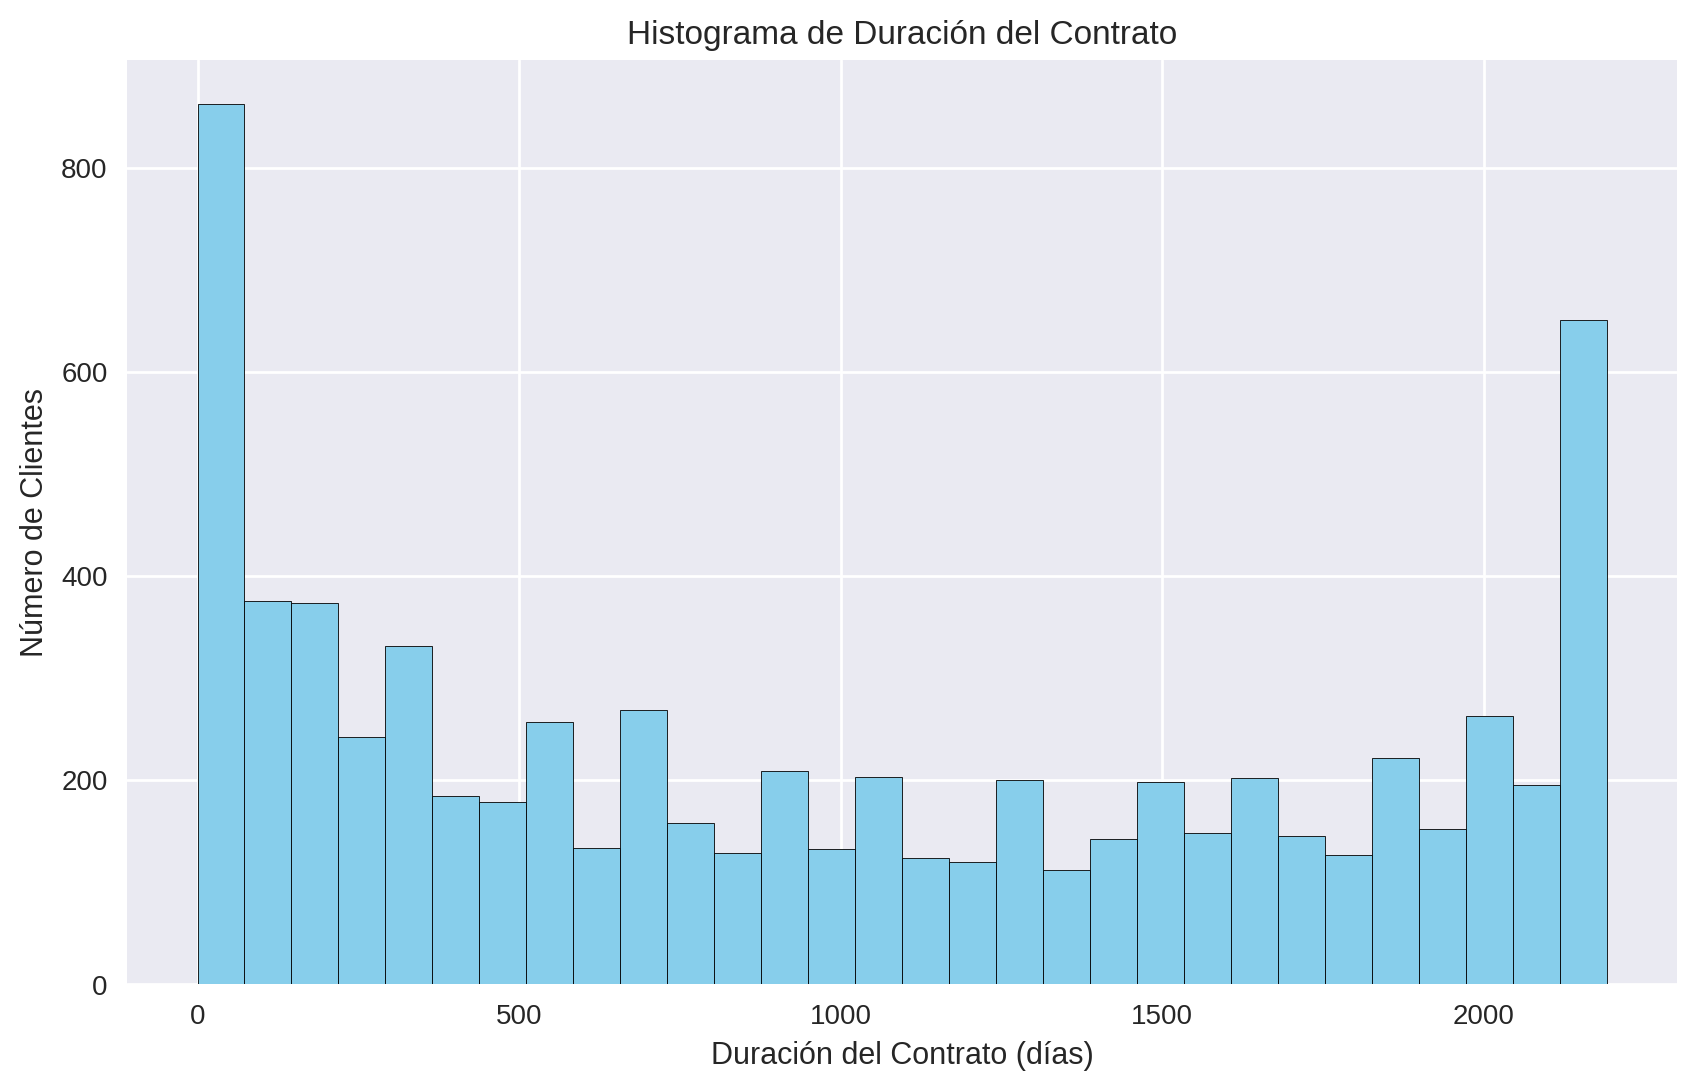

In [19]:
# Crear el histograma de la duración del contrato
plt.figure(figsize=(10, 6))
plt.hist(total_df['ContractDuration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Duración del Contrato')
plt.xlabel('Duración del Contrato (días)')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()

Vamos a revisar de forma gráfica un recuento acumulado de los contratos activos.

In [20]:
# Crear una serie temporal que contenga el recuento acumulado de contratos activos para cada fecha
# Usamos el método cumsum() para calcular el recuento acumulado
serie_temporal = total_df.groupby('BeginDate')['estado_contrato'].sum().cumsum()


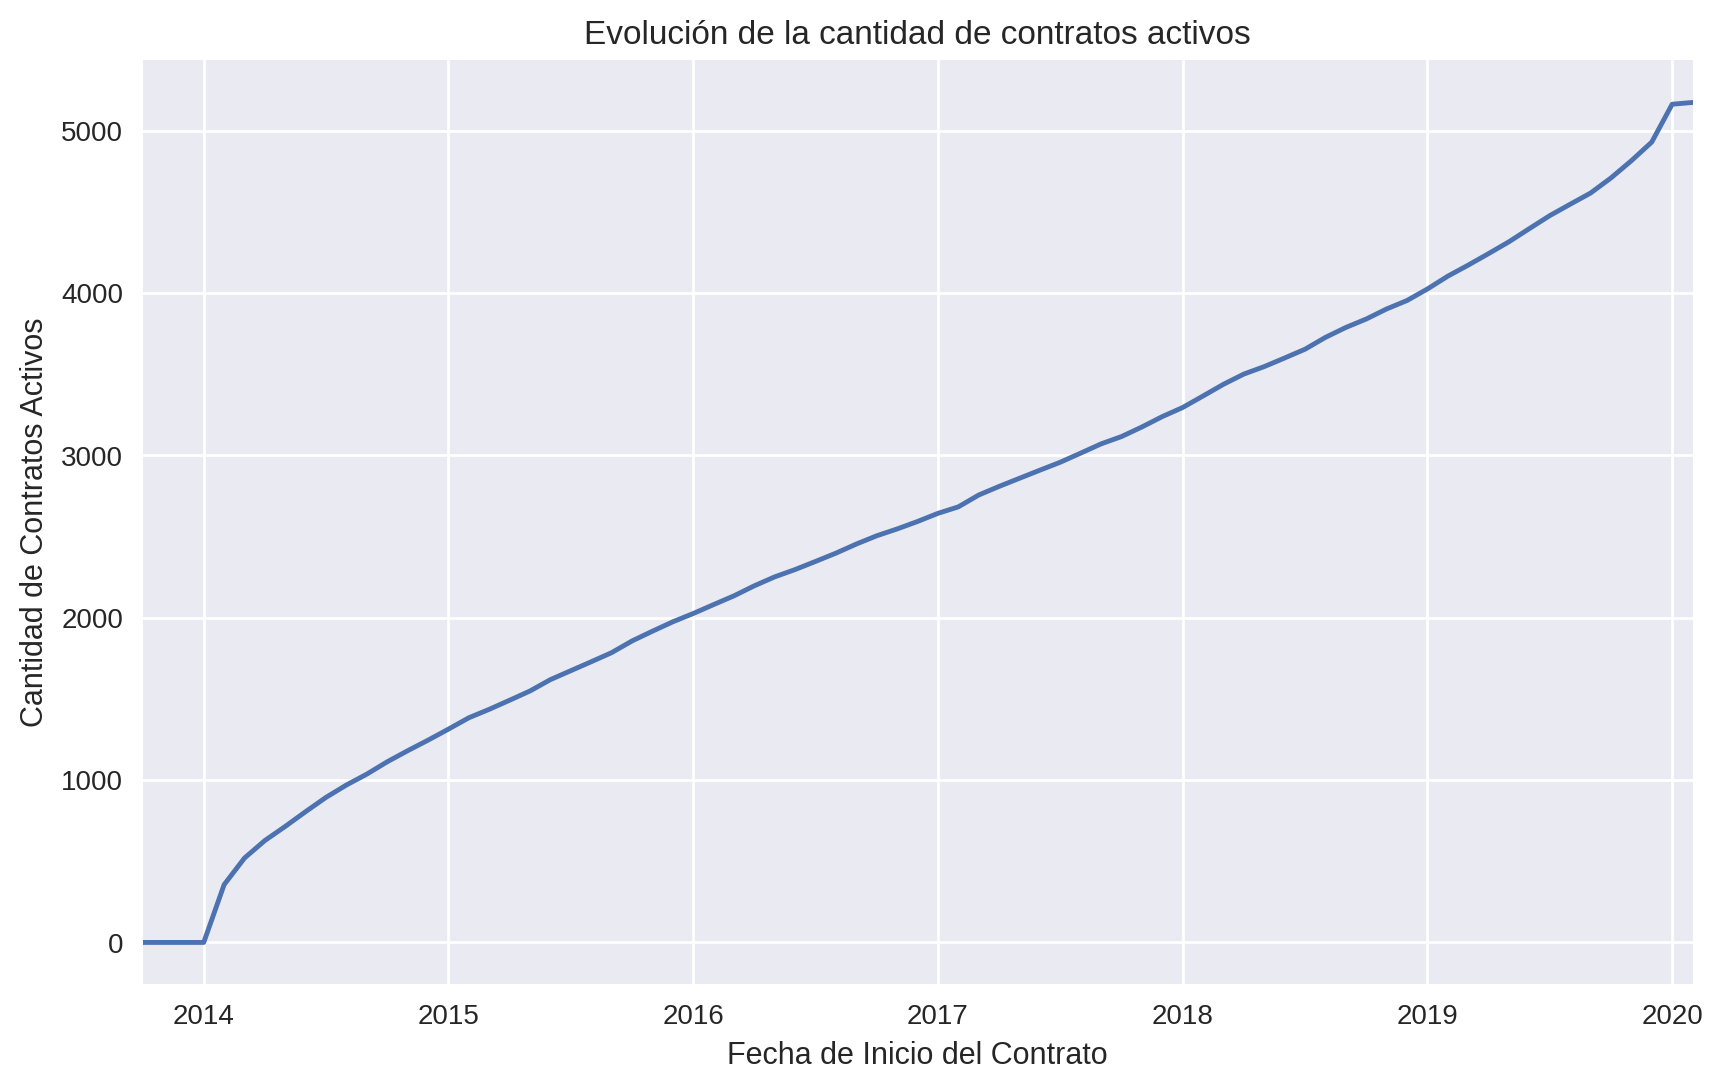

In [21]:
plt.figure(figsize=(10, 6))
serie_temporal.plot()
plt.title('Evolución de la cantidad de contratos activos')
plt.xlabel('Fecha de Inicio del Contrato')
plt.ylabel('Cantidad de Contratos Activos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Se añadió esta gráfica </b> <a class="tocSkip"></a>
</div>


**Añadiendo la columna de numero de servicios**

En relación a las variables: "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" y "StreamingMovies", se consideran servicios adicionales, por lo que se las analizará en forma conjunta, dado que por si solas no aportan información relevante. Se ha decidido añadir una columna con el número total de servicios, lo cual se ha considerado puede ser útil para el modelo de predicción. A continuación se muestra una matriz de correlación utilizando un mpapa de calor donde se puede observar la correlación entre toda la información categórica entregada para analizar 

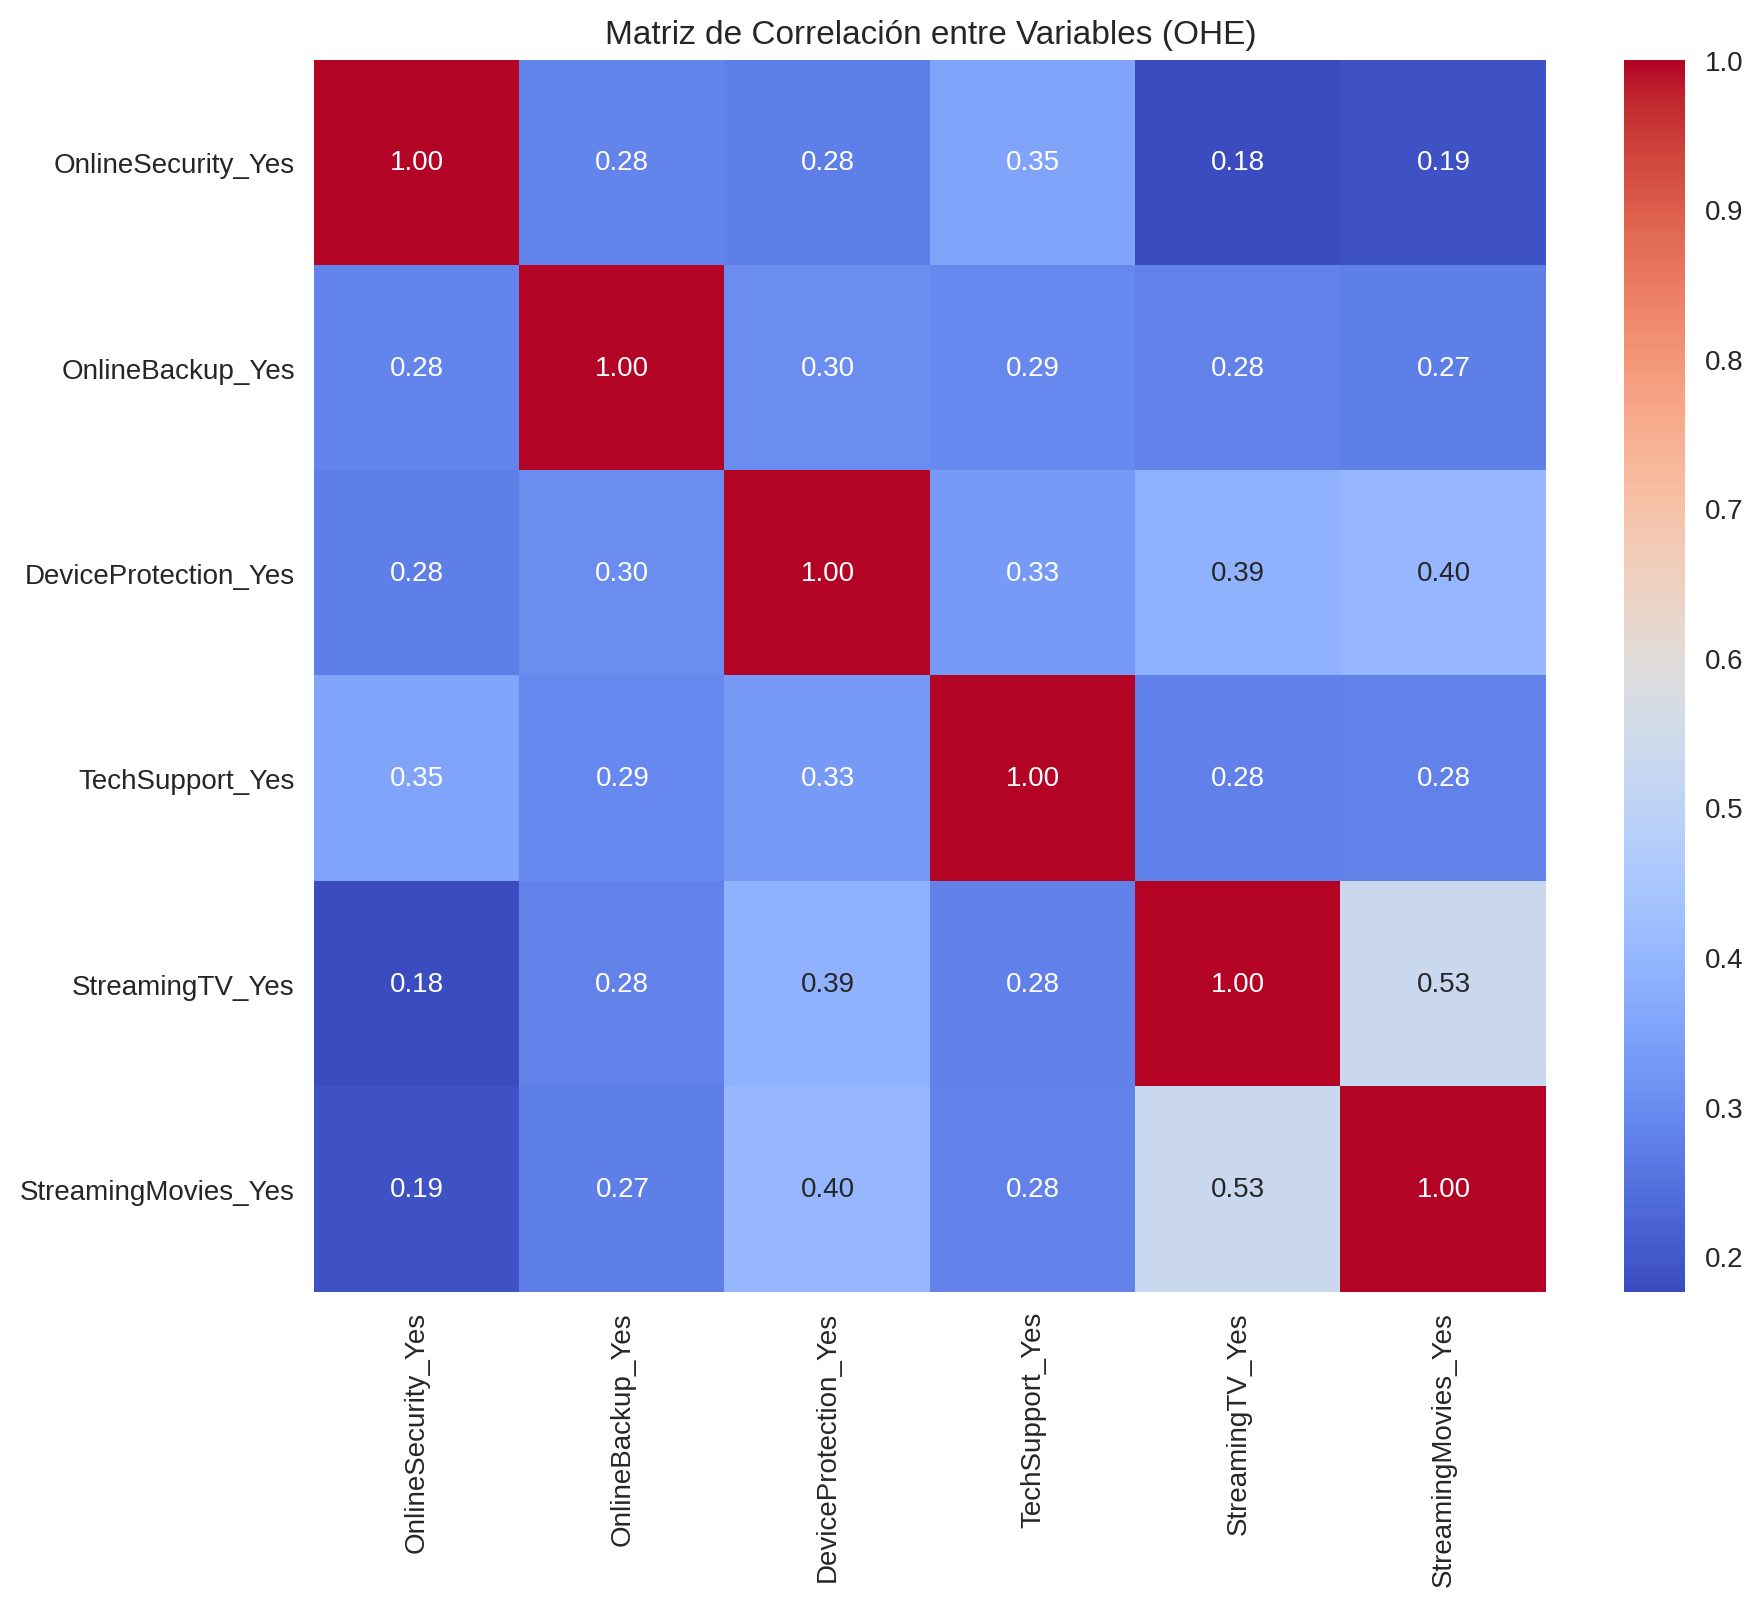

In [22]:
# Aplicar One-Hot Encoding a las variables categóricas
total_df_encoded = pd.get_dummies(total_df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = total_df_encoded.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación entre Variables (OHE)')
plt.show()

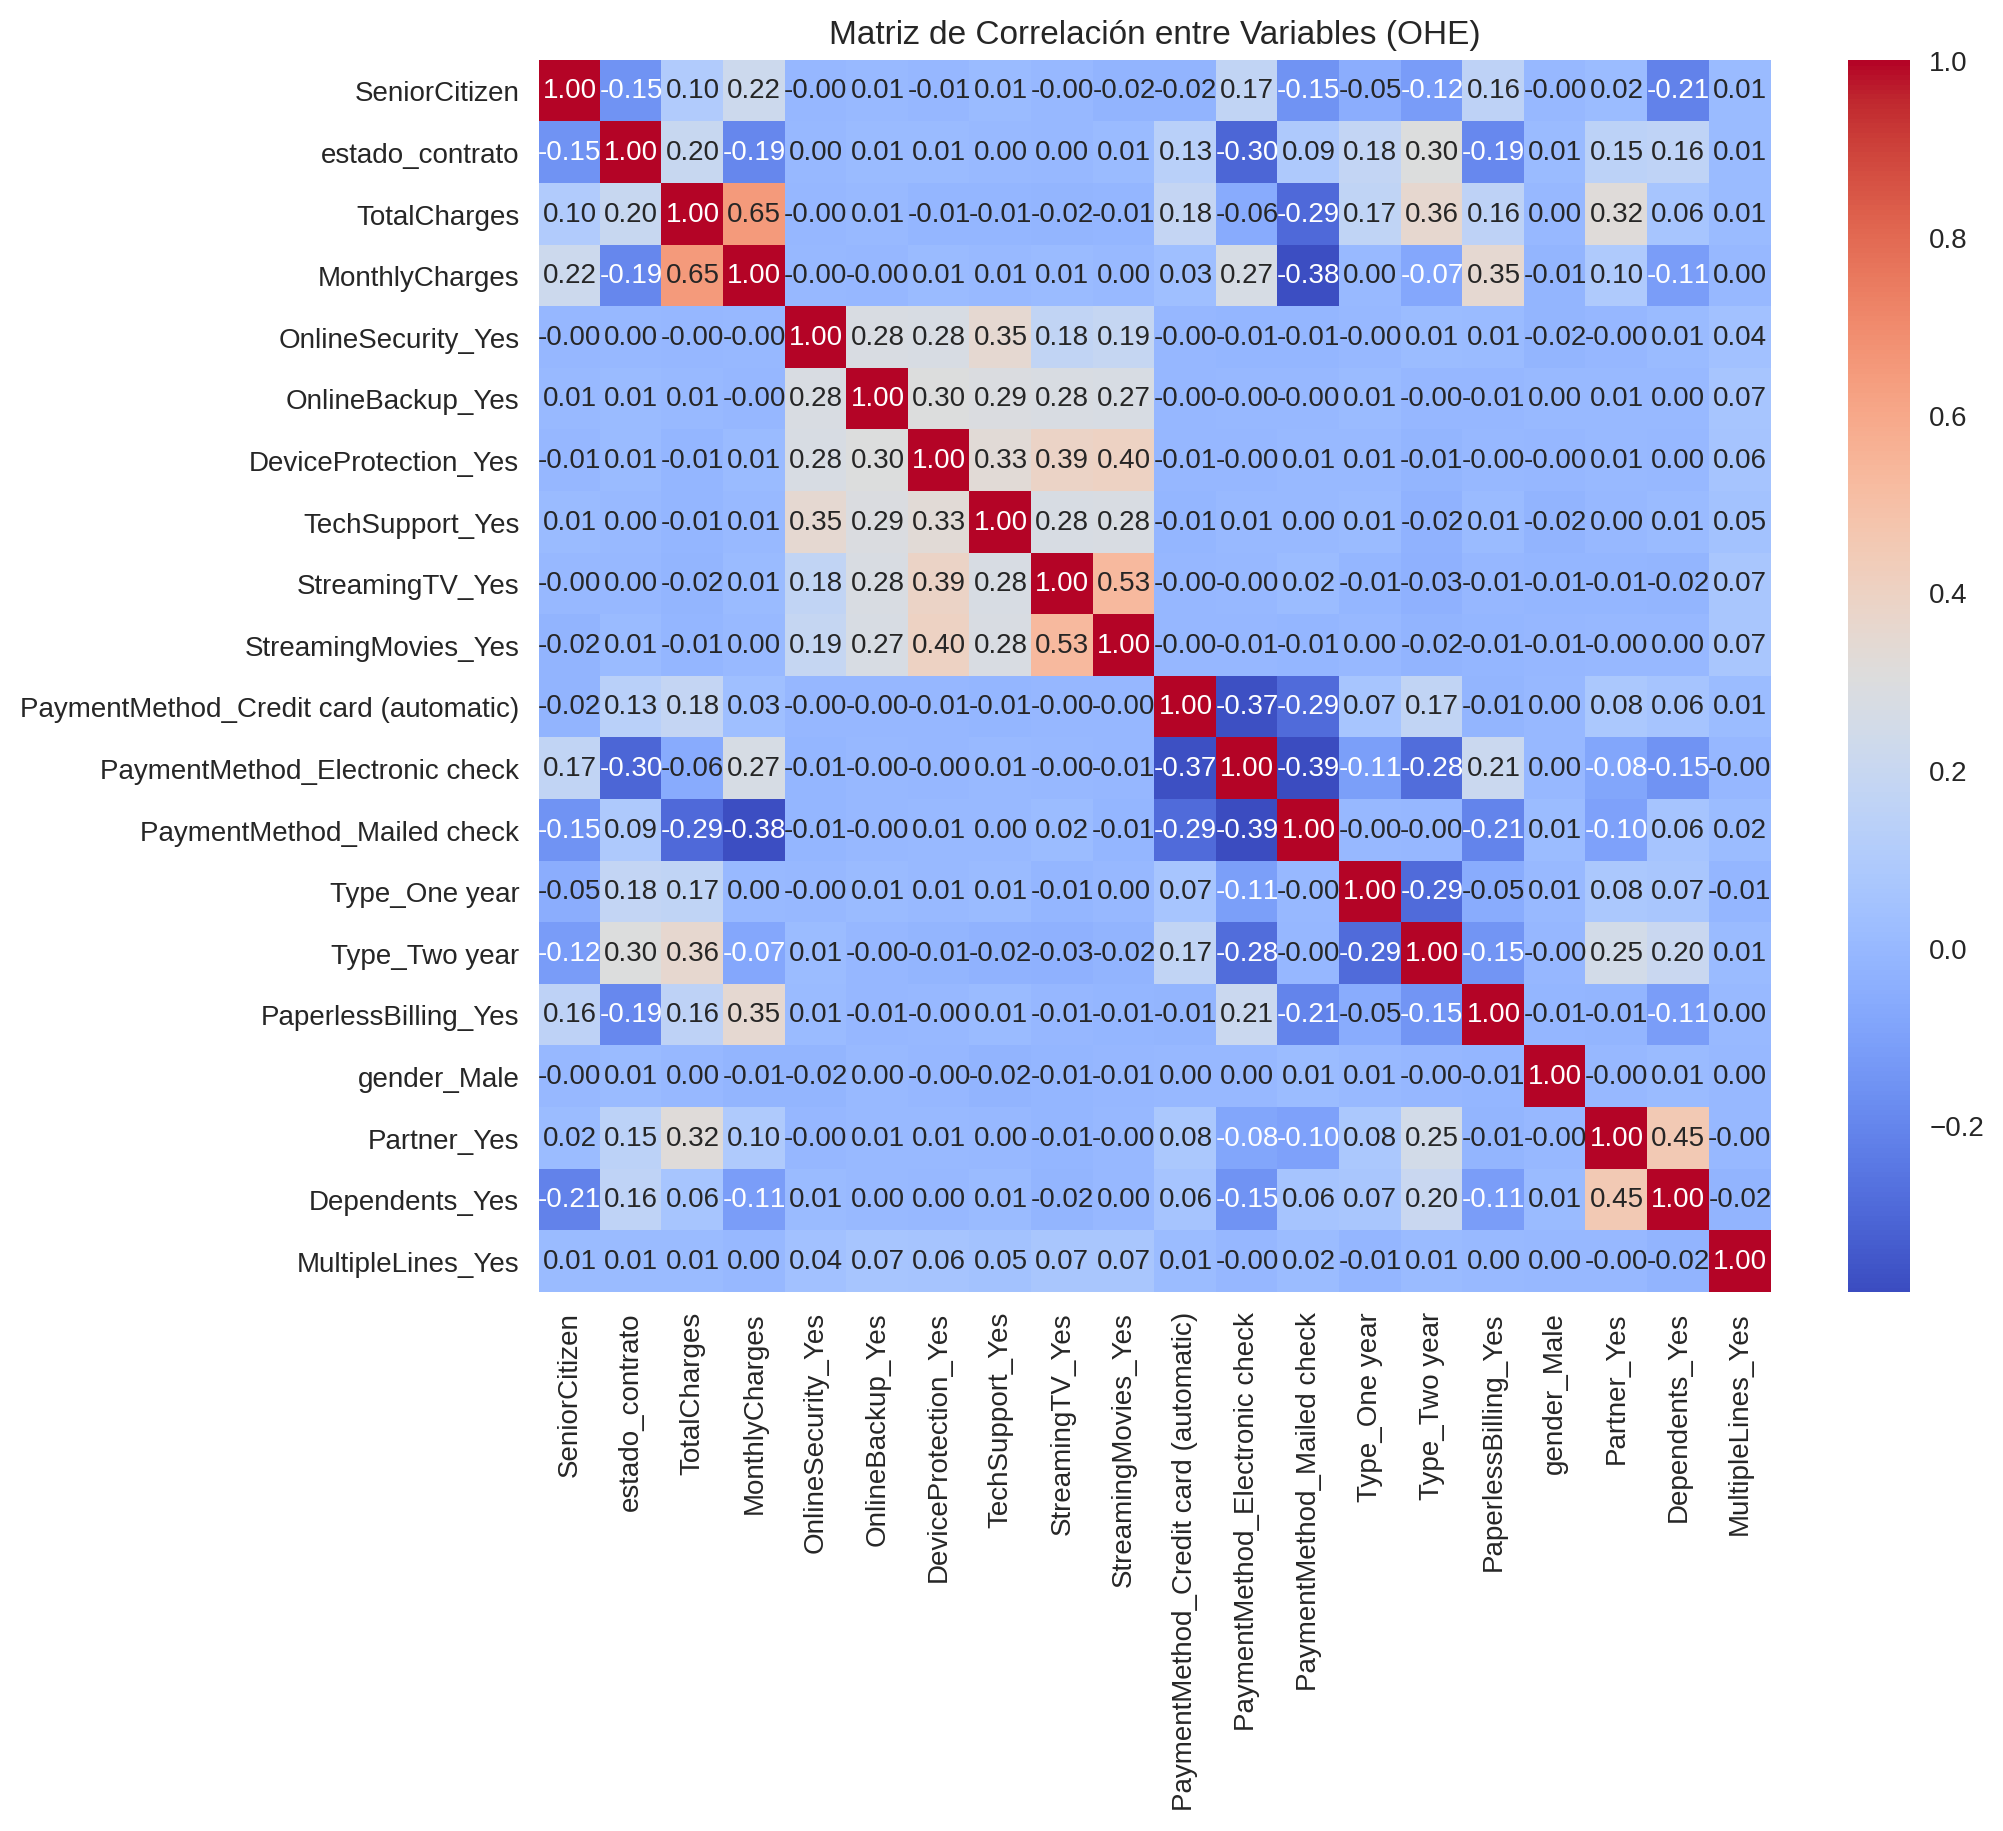

In [23]:
# Aplicar One-Hot Encoding a las variables categóricas
total_df_encoded = pd.get_dummies(total_df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
                                            'Type', 'PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
                                            'estado_contrato','TotalCharges', 'MonthlyCharges','BeginDate','EndDate']], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = total_df_encoded.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación entre Variables (OHE)')
plt.show()

De este gráfico se puede obtener alguna información importante:
- Hay dos servicios que estan fuertemente correlacionados que son las de StreamingTV y lade StreamingMovies, con una correlación de 0.53. Esta información indica que las personas que contratan el servicio de películas tambien contratan el servicio de TV.
- Tambien se ha detectado una baja correlación entre las personas que contratan los servicios de TV y  Movies, y el servicio de OnlineSecurity. Podría significar que estos dos servicios no presentan peligros de seguridad informática, por lo que los usuarios no contratan estos servicios.
- En cuanto a los demas servicios tiene un nivel de correlación entre 0.3 y 0.4, con lo que se podría decir que muchos servicios se contratan de forma grupal, pero esto no ocurre en la mayoría de casos
- Hay algunas columnas que no aportan mucho al la variable del estado de contrato como: "gender", "MultipleLines" y algunos de los servicios, por lo que estas columnas podría pensarse en eliminarlas.


Un indicador importante podría ser la cantidad de servicios que tiene contratado los usuarios, por lo que se creará una nueva columna con la suma de servicios adicionales que tiene un cliente
 

<div class="alert alert-block alert-info">
<b>Se añadió la matriz de correlación para verificar la relación entre caracteríticas</b> <a class="tocSkip"></a>
</div>


In [24]:
# Crear la nueva columna 'num_services' que cuenta el número de 'yes' en las columnas de servicios
total_df['num_services'] = total_df[internet_services].apply(lambda row: row.eq('Yes').sum(), axis=1)

A continuación se muestra una gráfica de como está distribuida la cantidad de clientes por servicio:

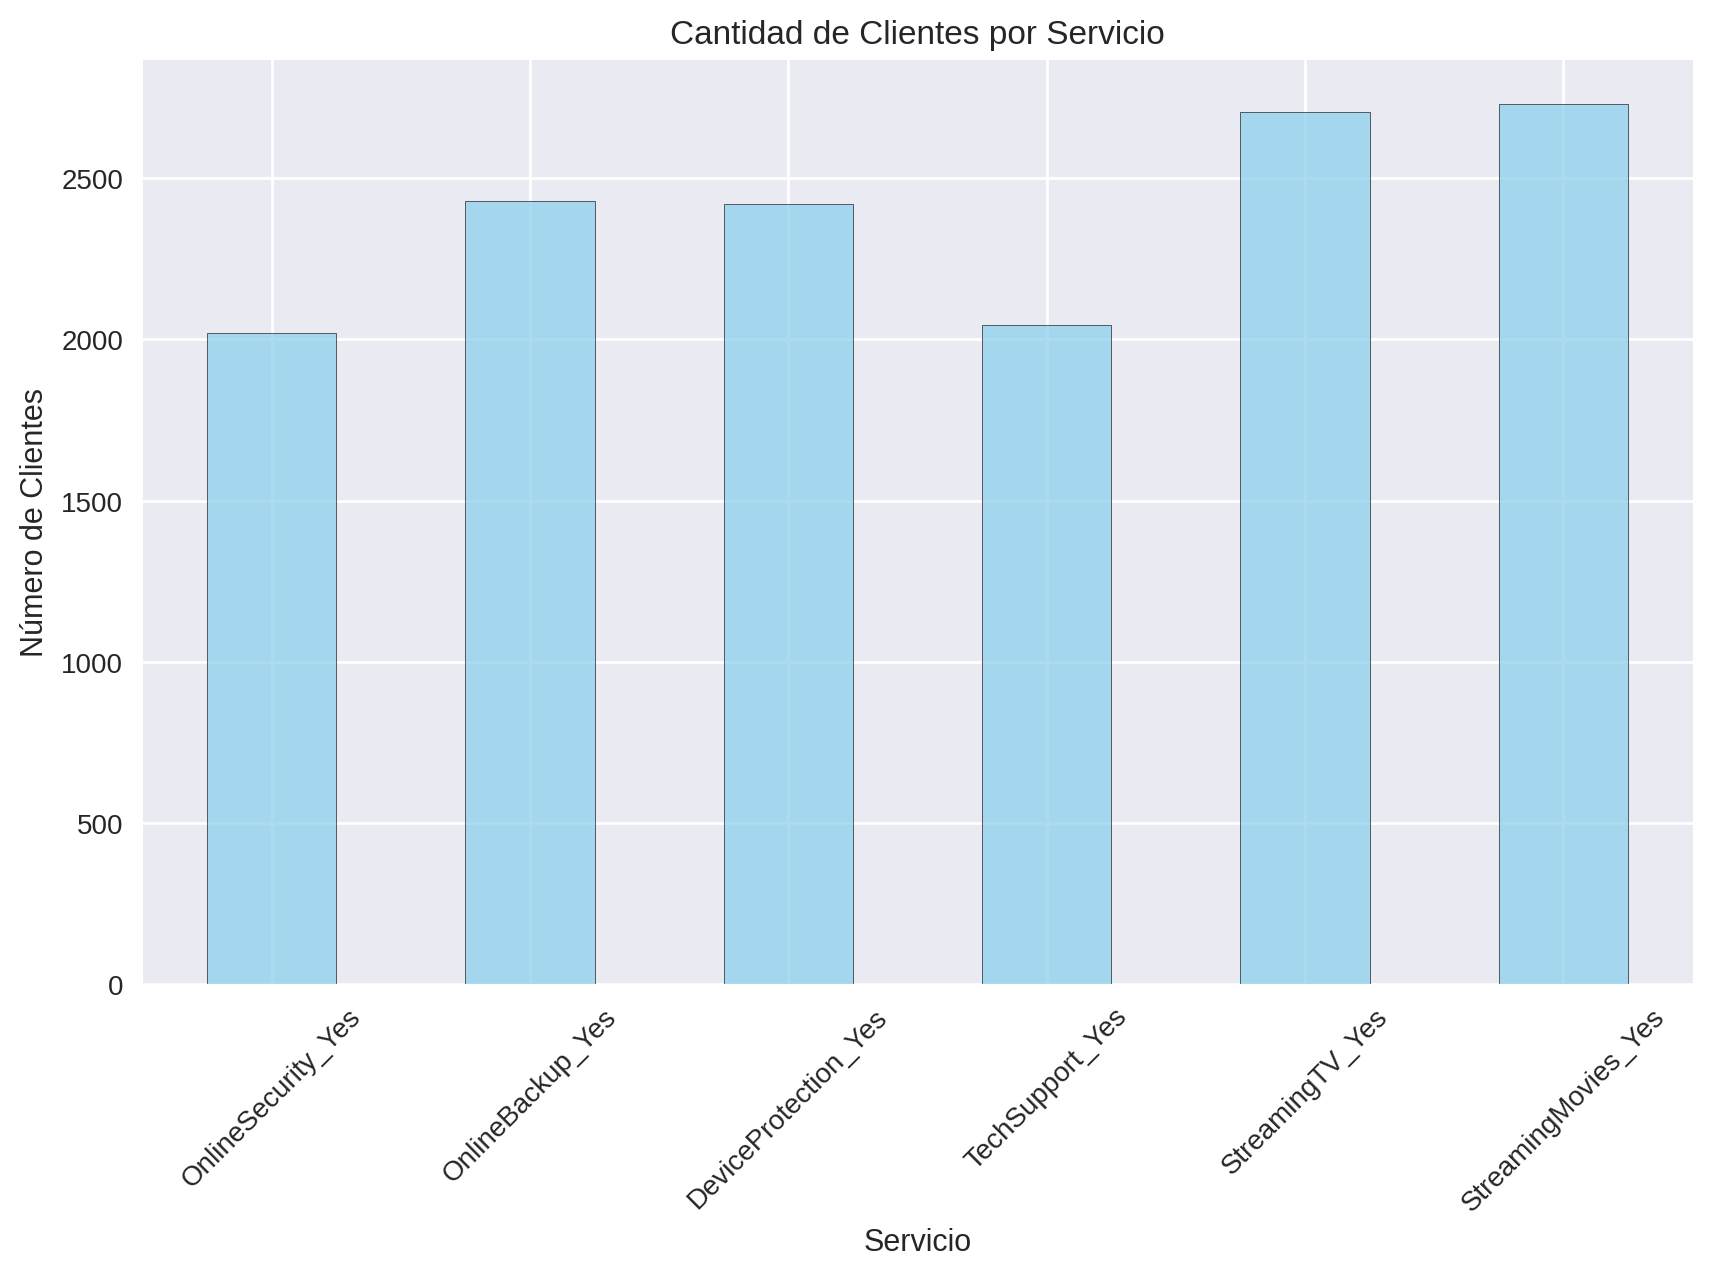

In [25]:
# Calcular la cantidad de clientes por servicio
services_count = total_df_encoded[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
services_count.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Cantidad de Clientes por Servicio')
plt.xlabel('Servicio')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Eliminación de columnas irrelevantes

Al realizar un análisis de la información obtenida se ha decidido eliminar ciertas columnas que se consideran no aportan información reelevante para los modelos de prediccion.
- La columna "customerID" es diferente para todos los usuarios por lo que se considera no aporta información.
- Las columnas "BeginDate" y "EndDate" no generan información reelevante ya que las fechas podrían considerarse irrelevantes en relación a finalizar o no un contrato
- Se eliminó también la columna de género ya que se considera no debería afectar la duración del contrato.
- Las columnas "EndDate_2" y "Cancelado" se añadieron solo por análisis de datos, pero no son necesarias para las predicciones.
- Se eliminó tambien la columna de TotalCharges, debido a que esta columna depende mucho de cuanto tiempo haya estado el usuario con el servicio y esto ya se tiene dentro de la columna de duración de contrato, por lo que se puede considerar repetititva.

In [26]:
#Seleccionando y eliminando las columnas indicadas
data_df = total_df.drop(['customerID', 'BeginDate', 'EndDate', 'gender', 'EndDate_2', 'Cancelado', 'TotalCharges'], axis=1)

In [27]:
data_df

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,Partner,Dependents,MultipleLines,estado_contrato,ContractDuration,num_services
0,Month-to-month,Yes,Electronic check,29.85,DSL,No,Yes,No,No,No,No,0,Yes,No,No,True,31,1
1,One year,No,Mailed check,56.95,DSL,Yes,No,Yes,No,No,No,0,No,No,No,True,1036,2
2,Month-to-month,Yes,Mailed check,53.85,DSL,Yes,Yes,No,No,No,No,0,No,No,No,False,61,2
3,One year,No,Bank transfer (automatic),42.30,DSL,Yes,No,Yes,Yes,No,No,0,No,No,Yes,True,1371,3
4,Month-to-month,Yes,Electronic check,70.70,Fiber optic,No,No,No,No,No,No,0,No,No,Yes,False,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84.80,NaN,No,No,No,No,No,No,0,Yes,Yes,NaN,True,730,0
7039,One year,Yes,Credit card (automatic),103.20,NaN,No,No,No,No,No,No,0,Yes,Yes,NaN,True,2191,0
7040,Month-to-month,Yes,Electronic check,29.60,NaN,No,No,No,No,No,No,0,Yes,Yes,NaN,True,337,0
7041,Month-to-month,Yes,Mailed check,74.40,NaN,No,No,No,No,No,No,1,Yes,No,NaN,False,123,0


**Revision de Valores ausentes**

Despues de los cambios realizados se va a verificar cuales son los datos ausentes que aun quedan en la base de datos:

In [28]:
data_df.isna().sum()

Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
InternetService     1526
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
estado_contrato        0
ContractDuration       0
num_services           0
dtype: int64

Finalmente quedan dos columnas con valores ausentes de las cuales se ha optado por no rellenarlas o eliminarlas ya que son una cantidad considerable de datos por lo que se trabajará con estos datos NaN

**Renombrando columnas para facilitar la codificación**

Se va a cambiar el nombre de las columnas para que sigan un formato más sencillo:

In [29]:
data_df=data_df.rename(columns={'Type':'plan_type', 'PaperlessBilling':'paperless_billing', 'PaymentMethod':'payment_method',
                                'MonthlyCharges':'monthly_charges', 'TotalCharges':'total_charges', 'InternetService':'internet_service',
                                'OnlineSecurity':'online_security','OnlineBackup':'online_backup','DeviceProtection':'device_protection',
                                'TechSupport':'tech_support','StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies',
                                'SeniorCitizen':'senior_citizen', 'Partner':'partner', 'Dependents':'dependents', 'MultipleLines':'multiple_lines',
                                'ContractDuration':'contract_duration', 'estado_contrato':'contract_status' })

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con el cambio de nombres.
</div>

In [30]:
data_df

,plan_type,paperless_billing,payment_method,monthly_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines,contract_status,contract_duration,num_services
0,Month-to-month,Yes,Electronic check,29.85,DSL,No,Yes,No,No,No,No,0,Yes,No,No,True,31,1
1,One year,No,Mailed check,56.95,DSL,Yes,No,Yes,No,No,No,0,No,No,No,True,1036,2
2,Month-to-month,Yes,Mailed check,53.85,DSL,Yes,Yes,No,No,No,No,0,No,No,No,False,61,2
3,One year,No,Bank transfer (automatic),42.30,DSL,Yes,No,Yes,Yes,No,No,0,No,No,Yes,True,1371,3
4,Month-to-month,Yes,Electronic check,70.70,Fiber optic,No,No,No,No,No,No,0,No,No,Yes,False,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84.80,NaN,No,No,No,No,No,No,0,Yes,Yes,NaN,True,730,0
7039,One year,Yes,Credit card (automatic),103.20,NaN,No,No,No,No,No,No,0,Yes,Yes,NaN,True,2191,0
7040,Month-to-month,Yes,Electronic check,29.60,NaN,No,No,No,No,No,No,0,Yes,Yes,NaN,True,337,0
7041,Month-to-month,Yes,Mailed check,74.40,NaN,No,No,No,No,No,No,1,Yes,No,NaN,False,123,0


#### Codificación de características y estandarización de valores

A continuación se va a realizar una codificación OHE para los valores categóricos. En este punto se va resolver el problema de los valores ausentes, para los cuales se va omitir eliminar una columna con drop_first, con lo que se va a tener una opción extra:

In [31]:
# Seleccionar solo las columnas categóricas para codificar
categorical_columns_sna = ['plan_type', 'paperless_billing', 'payment_method', 'online_security','online_backup', 
                           'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'senior_citizen',
                           'partner', 'dependents']

categorical_columns_na = ['internet_service', 'multiple_lines' ]

# Realizar one-hot encoding en las columnas categóricas
data_df_encoded_1 = pd.get_dummies(data_df, columns=categorical_columns_sna, drop_first = True)

data_df_encoded = pd.get_dummies(data_df_encoded_1, columns=categorical_columns_na)

# Mostrar las primeras filas del DataFrame codificado
print(data_df_encoded.head())

   monthly_charges  contract_status  contract_duration  num_services  \
0            29.85             True                 31             1   
1            56.95             True               1036             2   
2            53.85            False                 61             2   
3            42.30             True               1371             3   
4            70.70            False                 61             0   

   plan_type_One year  plan_type_Two year  paperless_billing_Yes  \
0                   0                   0                      1   
1                   1                   0                      0   
2                   0                   0                      1   
3                   1                   0                      0   
4                   0                   0                      1   

   payment_method_Credit card (automatic)  payment_method_Electronic check  \
0                                       0                                1   
1 

In [32]:
data_df_encoded

,monthly_charges,contract_status,contract_duration,num_services,plan_type_One year,plan_type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,senior_citizen_1,partner_Yes,dependents_Yes,internet_service_DSL,internet_service_Fiber optic,multiple_lines_No,multiple_lines_Yes
0,29.85,True,31,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,56.95,True,1036,2,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,53.85,False,61,2,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,42.30,True,1371,3,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,70.70,False,61,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,True,730,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
7039,103.20,True,2191,0,1,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0
7040,29.60,True,337,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
7041,74.40,False,123,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


Adicional se va a escalar los datos numéricos de las columnas 'monthly_charges', 'contract_duration' y 'num_services'

In [33]:
# Seleccionar solo las características numéricas para estandarizar
numeric_features = ['monthly_charges', 'contract_duration', 'num_services']
numeric_data = data_df_encoded[numeric_features]

# Inicializar el StandardScaler
scaler = StandardScaler()

# Estandarizar las características numéricas
scaled_data = scaler.fit_transform(numeric_data)

# Convertir el resultado a DataFrame y asignar nombres de columnas
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features)

# Reemplazar las características numéricas originales con las estandarizadas en el DataFrame original
data_df_encoded[numeric_features] = scaled_df

# Mostrar las primeras filas del DataFrame con las características estandarizadas
print(data_df_encoded.head())

   monthly_charges  contract_status  contract_duration  num_services  \
0        -1.160323             True          -1.277527     -0.561776   
1        -0.259629             True           0.066892     -0.020519   
2        -0.362660            False          -1.237396     -0.020519   
3        -0.746535             True           0.515031      0.520738   
4         0.197365            False          -1.237396     -1.103033   

   plan_type_One year  plan_type_Two year  paperless_billing_Yes  \
0                   0                   0                      1   
1                   1                   0                      0   
2                   0                   0                      1   
3                   1                   0                      0   
4                   0                   0                      1   

   payment_method_Credit card (automatic)  payment_method_Electronic check  \
0                                       0                                1   
1 

In [34]:
data_df_encoded['contract_status'].sum()

5174

### Revisión del estado de los datos

A continuación se muestra como se encuetra los datos que serán utilizados para el entrenamiento y predicción:

In [35]:
data_df_encoded

,monthly_charges,contract_status,contract_duration,num_services,plan_type_One year,plan_type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,senior_citizen_1,partner_Yes,dependents_Yes,internet_service_DSL,internet_service_Fiber optic,multiple_lines_No,multiple_lines_Yes
0,-1.160323,True,-1.277527,-0.561776,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,-0.259629,True,0.066892,-0.020519,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,-0.362660,False,-1.237396,-0.020519,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,-0.746535,True,0.515031,0.520738,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,0.197365,False,-1.237396,-1.103033,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.665992,True,-0.342454,-1.103033,1,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
7039,1.277533,True,1.611970,-1.103033,1,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0
7040,-1.168632,True,-0.868182,-1.103033,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
7041,0.320338,False,-1.154456,-1.103033,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


En la siguiente gráfica se observa como está dostribuido la característica objetivo en la base de datos entregada:

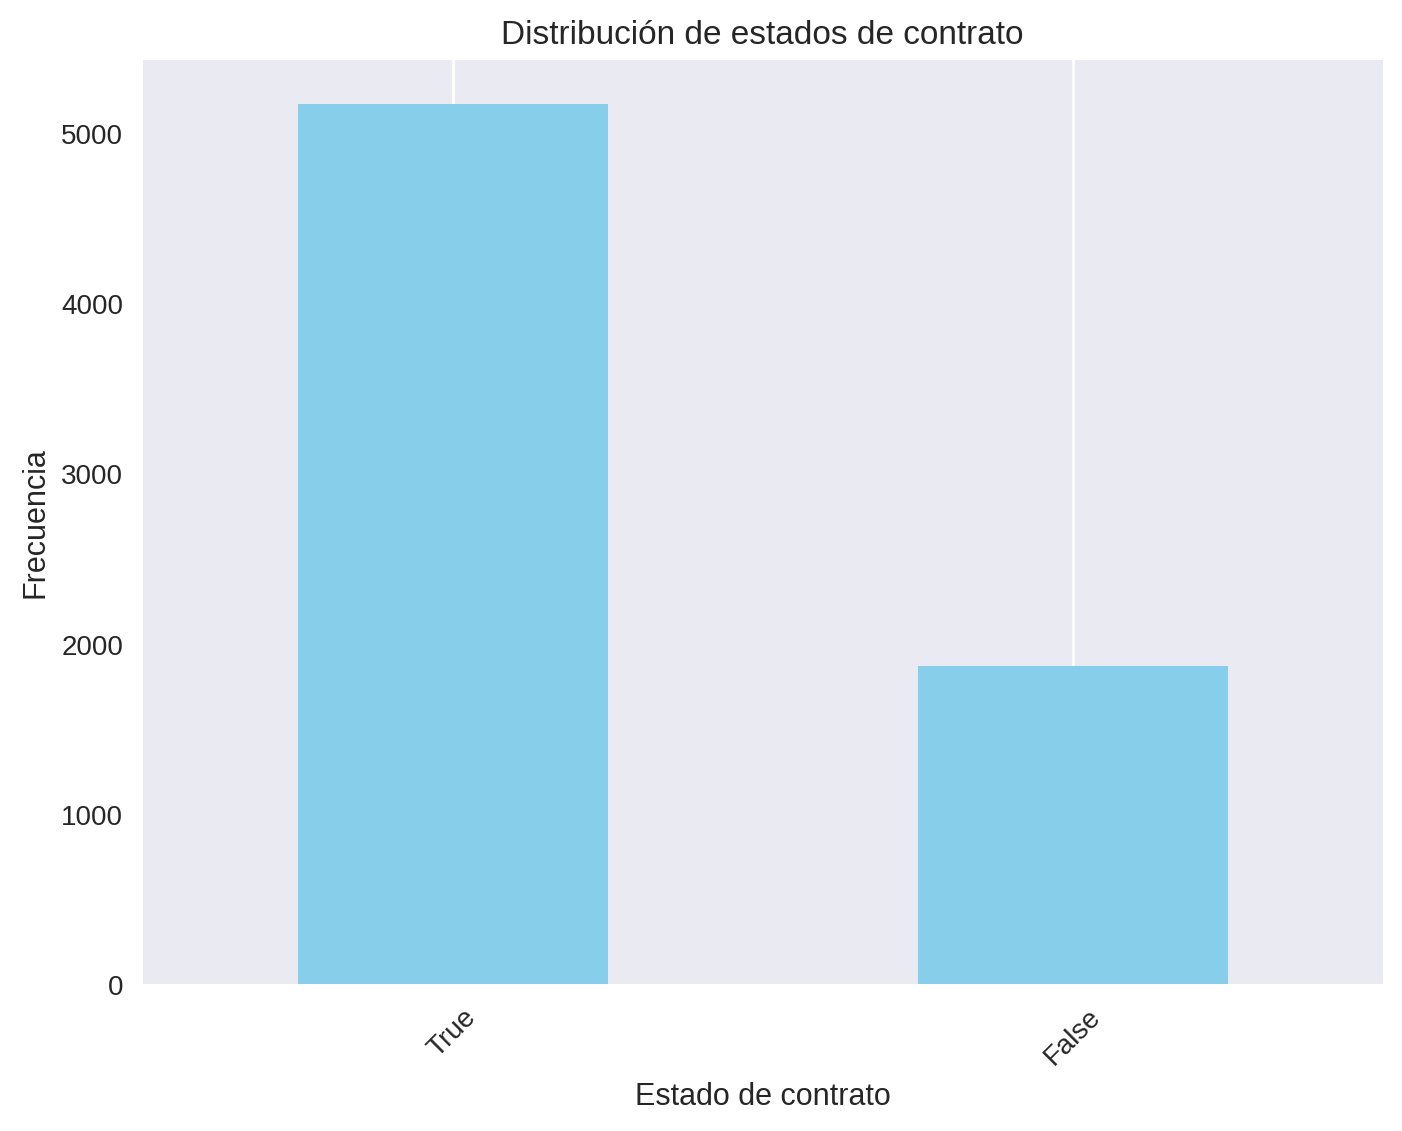

In [36]:
estado_contrato = data_df_encoded['contract_status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
estado_contrato.plot(kind='bar', color='skyblue')
plt.title('Distribución de estados de contrato')
plt.xlabel('Estado de contrato')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [37]:
estado_contrato

True     5174
False    1869
Name: contract_status, dtype: int64

<div class="alert alert-block alert-info">
<b>Se añadió una matriz de correlación y gráficos estídisticos de las variables. Los demás gráficos fueron incluidos en la tarea anterior donde se realizó un análisis de los datos. Se añadirá todos los gráficos más importantes obtenidos en el informe</b> <a class="tocSkip"></a>
</div>


### DIvisión entre datos de entrenamiento y de validación

A continuación se dividirá los datos en datos de entrenamiento y de validación. Como primer punto se extraerán las características y el objetivo: 

In [38]:
## Función para dividir entre datos de entrenamiento y de validación
def data_split(data, split_size):
    target = data['contract_status']
    features = data.drop('contract_status', axis=1)
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = split_size,
                                                                                  random_state = 12345)
    return features_train, features_valid, target_train, target_valid

In [39]:
## Aplicando la función a los datos
[features_train, features_valid, target_train, target_valid] = data_split(data_df_encoded, 0.25)

A continuación se imprime una muestra de como están los datos divididos.

In [40]:
features_train

,monthly_charges,contract_duration,num_services,plan_type_One year,plan_type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,online_security_Yes,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,senior_citizen_1,partner_Yes,dependents_Yes,internet_service_DSL,internet_service_Fiber optic,multiple_lines_No,multiple_lines_Yes
845,-1.469417,-0.707654,-0.020519,1,0,0,0,0,1,0,...,1,1,0,0,1,1,0,1,0,1
6386,0.624447,1.611970,-1.103033,0,1,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1194,-0.475663,-0.747786,-0.020519,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
5787,0.757391,0.145818,-1.103033,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3585,0.843804,0.066892,1.603253,1,0,0,0,0,1,0,...,1,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,0.150835,-1.236058,0.520738,0,0,1,0,1,0,0,...,0,1,1,1,1,0,0,1,0,1
3492,-1.181926,-1.195926,0.520738,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
2177,1.259254,1.611970,-0.561776,0,1,1,1,0,0,0,...,0,0,0,1,1,0,0,1,1,0
3557,-0.176539,0.026760,2.144510,0,0,1,0,0,0,1,...,1,1,1,1,0,0,0,1,1,0


In [41]:
features_valid

,monthly_charges,contract_duration,num_services,plan_type_One year,plan_type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,online_security_Yes,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,senior_citizen_1,partner_Yes,dependents_Yes,internet_service_DSL,internet_service_Fiber optic,multiple_lines_No,multiple_lines_Yes
1128,-1.507638,-0.219383,-0.561776,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2875,0.675963,-0.425393,1.061995,0,0,1,0,1,0,1,...,1,1,0,0,1,0,1,0,0,1
1783,0.228939,-1.278865,2.144510,0,0,1,0,1,0,1,...,1,1,1,0,0,1,0,1,0,1
3804,0.501474,-0.909652,2.144510,0,0,0,0,1,0,1,...,1,1,1,0,0,0,0,1,0,1
6087,-0.824640,-0.259515,-1.103033,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,-0.012021,-1.114324,-1.103033,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5136,0.260514,-1.236058,-0.020519,0,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2801,1.372256,1.206638,-0.561776,1,0,1,1,0,0,0,...,0,1,0,0,1,1,0,1,1,0
4408,0.222292,1.611970,-1.103033,0,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1


In [42]:
target_train

845      True
6386     True
1194     True
5787    False
3585     True
        ...  
3497     True
3492     True
2177     True
3557     True
4578     True
Name: contract_status, Length: 5282, dtype: bool

In [43]:
target_valid

1128     True
2875    False
1783    False
3804     True
6087     True
        ...  
6927     True
5136     True
2801     True
4408     True
404      True
Name: contract_status, Length: 1761, dtype: bool

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

## Entrenamiento de modelos de prediccion:

El siguiente paso es preparar los modelos que se van a utilizar para la predicción. Para el presente proyecto se ha decidido utilizar los siguientes modelos de predicción:

- Modelo Dummy
- Modelo de Regresión Lineal
- Modelo de Arbol de Decisión (DecisionTree)
- Modelo de Bosque Aleatorio (RandomForest)
- Modelo LightGBM
- Modelo Catboost
- Modelo XGBoost

Adicional, dado a que existe un desbalance de clase, que a pesar de no ser tan amplio, puede afectar las predicciones, se ha decidio probar los modelos antes mencionados con los datos orginales, con sobremuestreo y con submuestreo.

Para todos los modelos que se han planteado se obtendrá lo siguiente.
- Se utilizará GridSearch o RandomSearch para obtener los mejores hiperparámetros de cada modelo, con los cuales se realizarán los entrenamientos.
- Se obtendrán los valores de la matriz de confusión, Exactitud, Precisión, F1, AUC-ROC, Curva Precision-Recall, Curva ROC.
- Obtenidos los datos se va a resumir los resultados en un cuadro.

### Modelo dummy para referencia:
Se va a crear un modelo dummy que va a servir como referencia para comparar los diferentes modelos de prediccion

In [44]:
dummy_model = DummyClassifier(strategy='most_frequent')  
dummy_model.fit(features_train, target_train)

# Hacer predicciones con el modelo Dummy
dummy_predictions = dummy_model.predict(features_valid)

# Calcular la precisión del modelo Dummy
dummy_accuracy = accuracy_score(target_valid, dummy_predictions)

print("Exactitud del modelo Dummy:", dummy_accuracy)

Exactitud del modelo Dummy: 0.7308347529812607


El modelo Dummy nos da un porcentaje de precision del 73.08%. Este modelo predice que todos son "true". El objetivo sera mejorar este porcentaje. 

Obteniendo la matriz de confusión

In [45]:
confusion_matrix(target_valid, dummy_predictions)

array([[   0,  474],
       [   0, 1287]])

Obteniendo la precisión:

In [46]:
precision_score(target_valid, dummy_predictions)

0.7308347529812607

Obteniendo el valor de F1

In [47]:
f1_score(target_valid, dummy_predictions)

0.844488188976378

Obteniendo el valor de AUC-ROC

In [48]:
auc_roc=roc_auc_score(target_valid, dummy_predictions)
auc_roc 

0.5

### Funciones para obtener las estadisticas:

En esta sección se van a generar las funciones que se utilizarán para obtener las estadísticas numéricas de las predicciones realizadas

In [49]:
### Funcion para tabla Precision - Recall:

def precision_recall_table(probabilities, target_valid):

    for threshold in np.arange(0, 1.0 , 0.02):
        predicted_valid = probabilities > threshold
        precision = precision_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)

        print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(threshold, precision, recall))




In [50]:
#Funcion para grafica precision-recall curve

def prec_recall_curve(target_valid, probabilities):
    
    precision_c, recall_c, thresholds = precision_recall_curve(target_valid, probabilities)
    
    plt.figure(figsize=(6, 6))
    plt.step(recall_c, precision_c, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.show() 

In [51]:
### CUrva ROC

def roc_curve_func(target_valid_f, probabilities_one_valid_f):
    fpr, tpr, thresholds = roc_curve(target_valid_f, probabilities_one_valid_f)

    plt.figure()
    plt.plot(fpr, tpr)

    # Curva ROC para modelo aleatorio 
    plt.plot([0, 1], [0, 1], linestyle='--')

    # < utiliza las funciones plt.xlim() y plt.ylim() para
    #   establecer el límite para los ejes de 0 a 1 >

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # < utiliza las funciones plt.xlabel() y plt.ylabel() para
    #   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')

    # < agrega el encabezado "Curva ROC" con la función plt.title() >
    plt.title('Curva ROC')


    plt.show()

In [52]:
def recall_presicion_roc(model, features_valid, target_valid):
    pred_probabilities = model.predict_proba(features_valid)
    probabilities_one_valid = pred_probabilities[:,1]
    prec_recall_curve(target_valid, probabilities_one_valid)
    roc_curve_func(target_valid, probabilities_one_valid)
    auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
    print("AUC-ROC: ", auc_roc)
    

In [53]:
def parameters_prediction(target_valid, prediction):
    
    print("Matriz de confusión: \n", confusion_matrix(target_valid, prediction))
    print("Precision: ", precision_score(target_valid, prediction))
    print("F1 Score: ", f1_score(target_valid, prediction))

### Regresión Lineal

In [54]:
### Función para probar con regresión lineal

def LogisticRegMod(features_train, features_valid, target_train, target_valid):
    model = LogisticRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
          
    accuracy = accuracy_score(target_valid, predictions_valid)
        
    print("Exactitud del modelo de regresión lineal en el conjunto de validación:", accuracy)
       
    return predictions_valid, model

In [55]:
pred_linear_reg, model_linear_reg= LogisticRegMod(features_train, features_valid, target_train, target_valid)

Exactitud del modelo de regresión lineal en el conjunto de validación: 0.7859170925610448


In [56]:
parameters_prediction(target_valid, pred_linear_reg)

Matriz de confusión: 
 [[ 238  236]
 [ 141 1146]]
Precision:  0.829232995658466
F1 Score:  0.858748594979393


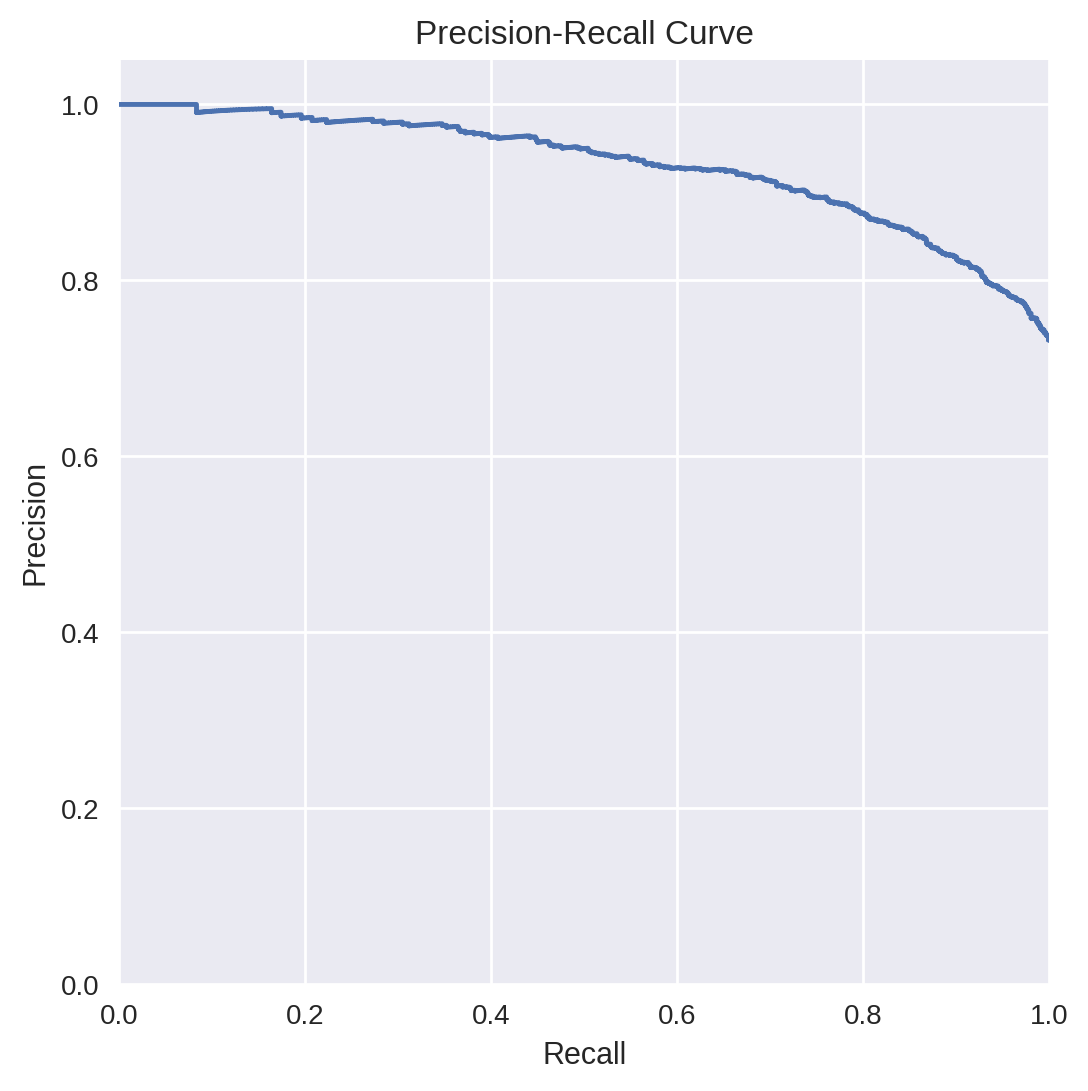

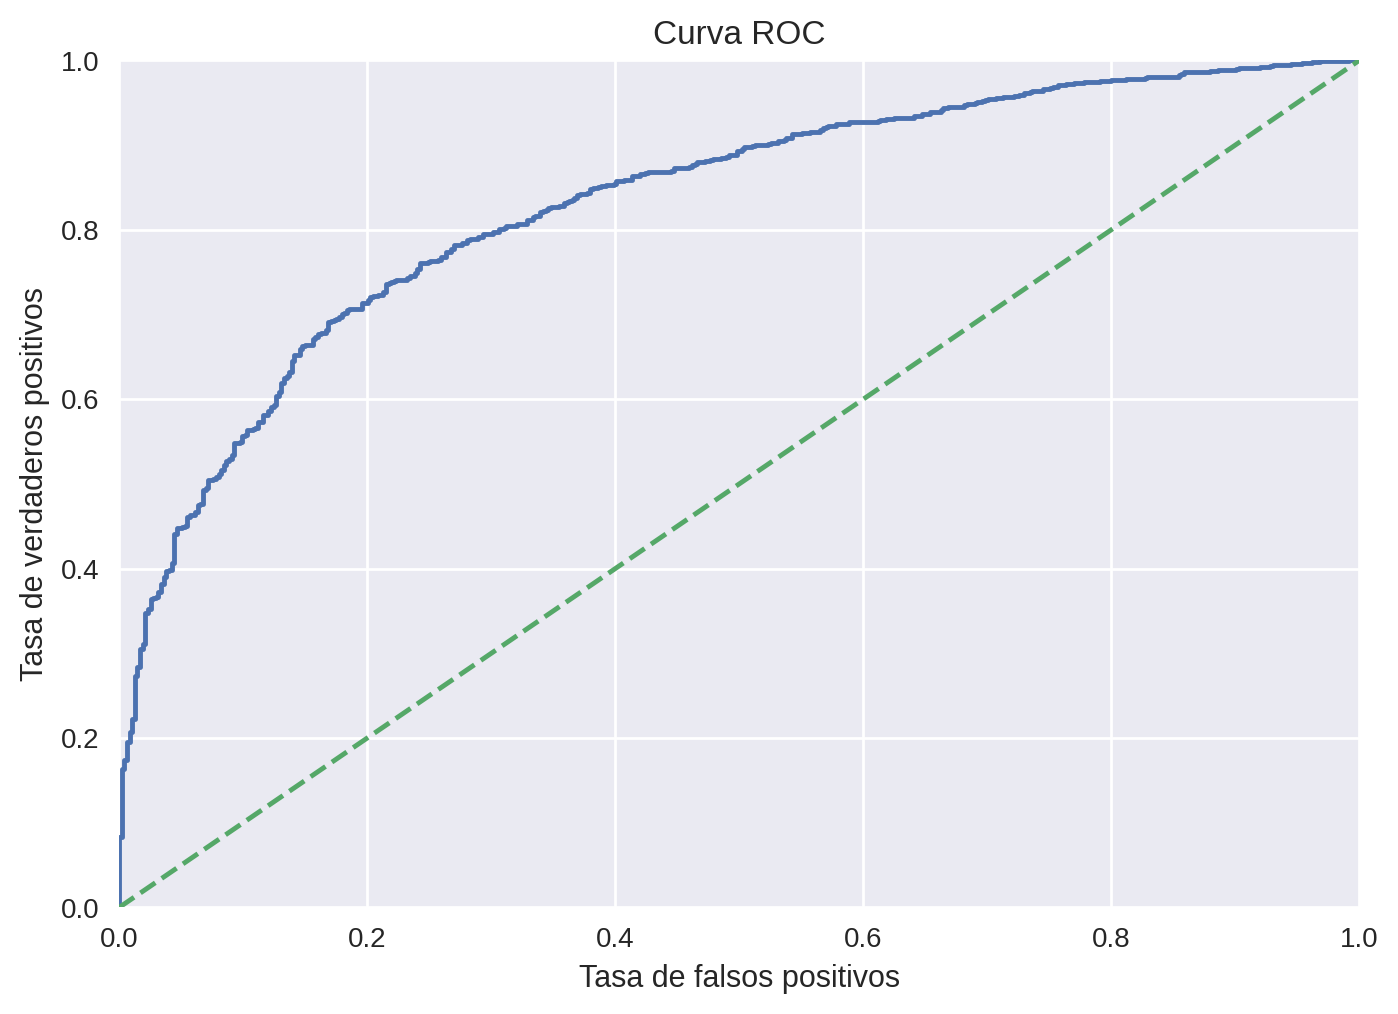

AUC-ROC:  0.83099905251804


In [57]:
recall_presicion_roc(model_linear_reg,features_valid, target_valid)

### Decision Tree - Grid Search

In [58]:
# Parámetros
param_grid_dt = {
    'max_depth': [None, 5, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [59]:

def grid_search_decision_tree(X_train, X_valid, y_train, y_valid, param_grid):
    """Realiza una búsqueda de cuadrícula para encontrar los mejores parámetros para un árbol de decisión."""
    # Inicializar el modelo de árbol de decisión
    dt_classifier = DecisionTreeClassifier()
    
    # Inicializar el objeto GridSearchCV
    grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
    
    # Realizar la búsqueda de cuadrícula en los datos de entrenamiento
    grid_search.fit(X_train, y_train)
    
    # Obtener los mejores parámetros y el mejor modelo
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Evaluar el mejor modelo en los datos de validación
    accuracy = best_model.score(X_valid, y_valid)
    
    return best_params, accuracy, best_model



In [60]:

# Llamar a la función grid_search_decision_tree con tus datos de entrenamiento y validación
best_params_DT, accuracy, best_model_DT_GS = grid_search_decision_tree(features_train, features_valid, target_train, target_valid, param_grid_dt)

print("Mejores parámetros encontrados:", best_params_DT)
print("Precisión del mejor modelo en los datos de validación:", accuracy)

Mejores parámetros encontrados: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Precisión del mejor modelo en los datos de validación: 0.8023850085178875


In [61]:
pred_DT_GS = best_model_DT_GS.predict(features_valid)
parameters_prediction(target_valid, pred_DT_GS)

Matriz de confusión: 
 [[ 232  242]
 [ 106 1181]]
Precision:  0.8299367533380183
F1 Score:  0.8715867158671587


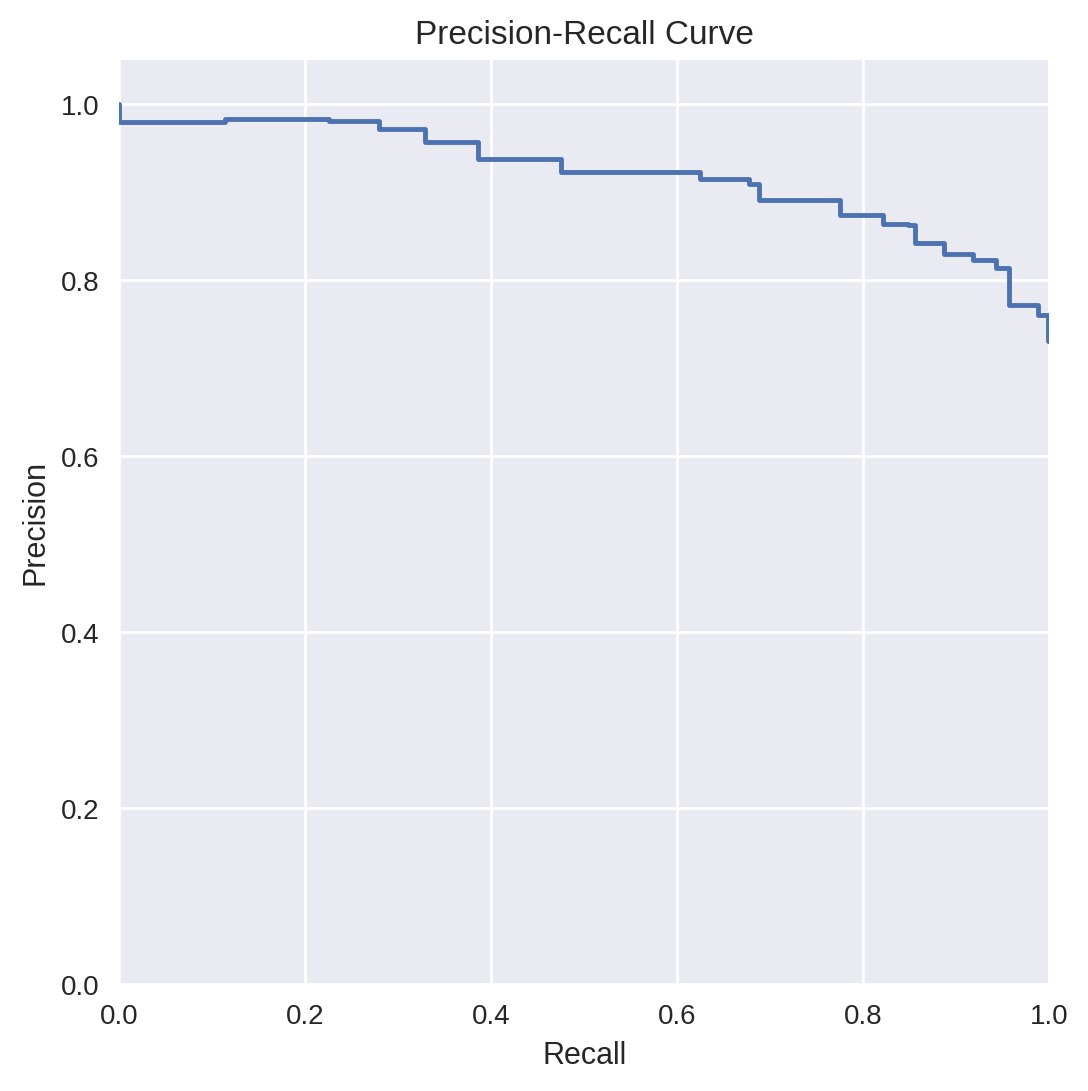

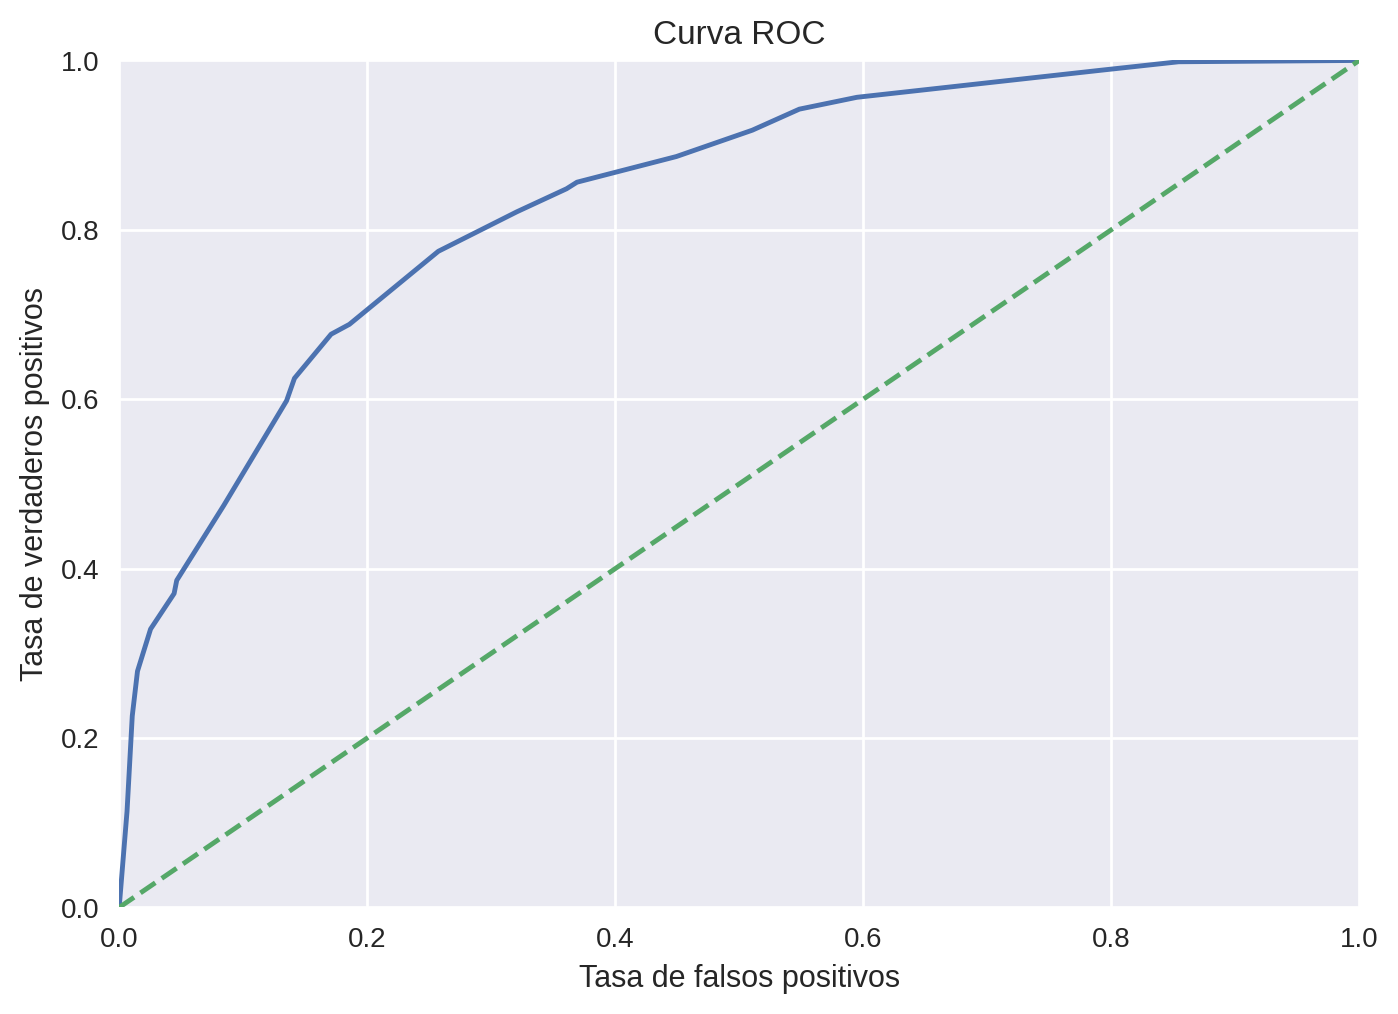

AUC-ROC:  0.8366634537520614


In [62]:
recall_presicion_roc(best_model_DT_GS,features_valid, target_valid)

###  Random Forest - Grid Search

In [63]:
# Ejemplo de parámetros a probar en la búsqueda de cuadrícula para Random Forest

param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 20, 25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [64]:
# Para random Forest

def grid_search_random_forest(X_train, X_valid, y_train, y_valid, param_grid):
    """Realiza una búsqueda de cuadrícula para encontrar los mejores parámetros para un Bosque Aleatorio."""
    # Inicializar el modelo de Bosque Aleatorio
    rf_classifier = RandomForestClassifier()
    
    # Inicializar el objeto GridSearchCV
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
    
    # Crear barra de progreso
    with tqdm(total=len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])) as pbar:
        # Realizar la búsqueda de cuadrícula en los datos de entrenamiento
        grid_search.fit(X_train, y_train)
        
        # Actualizar la barra de progreso
        pbar.update() 
   
    
    # Obtener los mejores parámetros y el mejor modelo
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Evaluar el mejor modelo en los datos de validación
    accuracy = best_model.score(X_valid, y_valid)
    
    return best_params, accuracy, best_model 


In [65]:

# Llamar a la función grid_search_random_forest con tus datos de entrenamiento y validación
best_params_rf, accuracy, best_model_RF_GS = grid_search_random_forest(features_train, features_valid, target_train, target_valid, param_grid_rf)
print("Mejores parámetros encontrados:", best_params_rf)
print("Exactitud del mejor modelo en los datos de validación:", accuracy)

  2%|▏         | 1/60 [14:06<13:52:29, 846.59s/it]


Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Exactitud del mejor modelo en los datos de validación: 0.7967064168086314


In [66]:
pred_RF_GS = best_model_RF_GS.predict(features_valid)

In [67]:
parameters_prediction(target_valid, pred_RF_GS)

Matriz de confusión: 
 [[ 214  260]
 [  98 1189]]
Precision:  0.8205659075224293
F1 Score:  0.8691520467836257


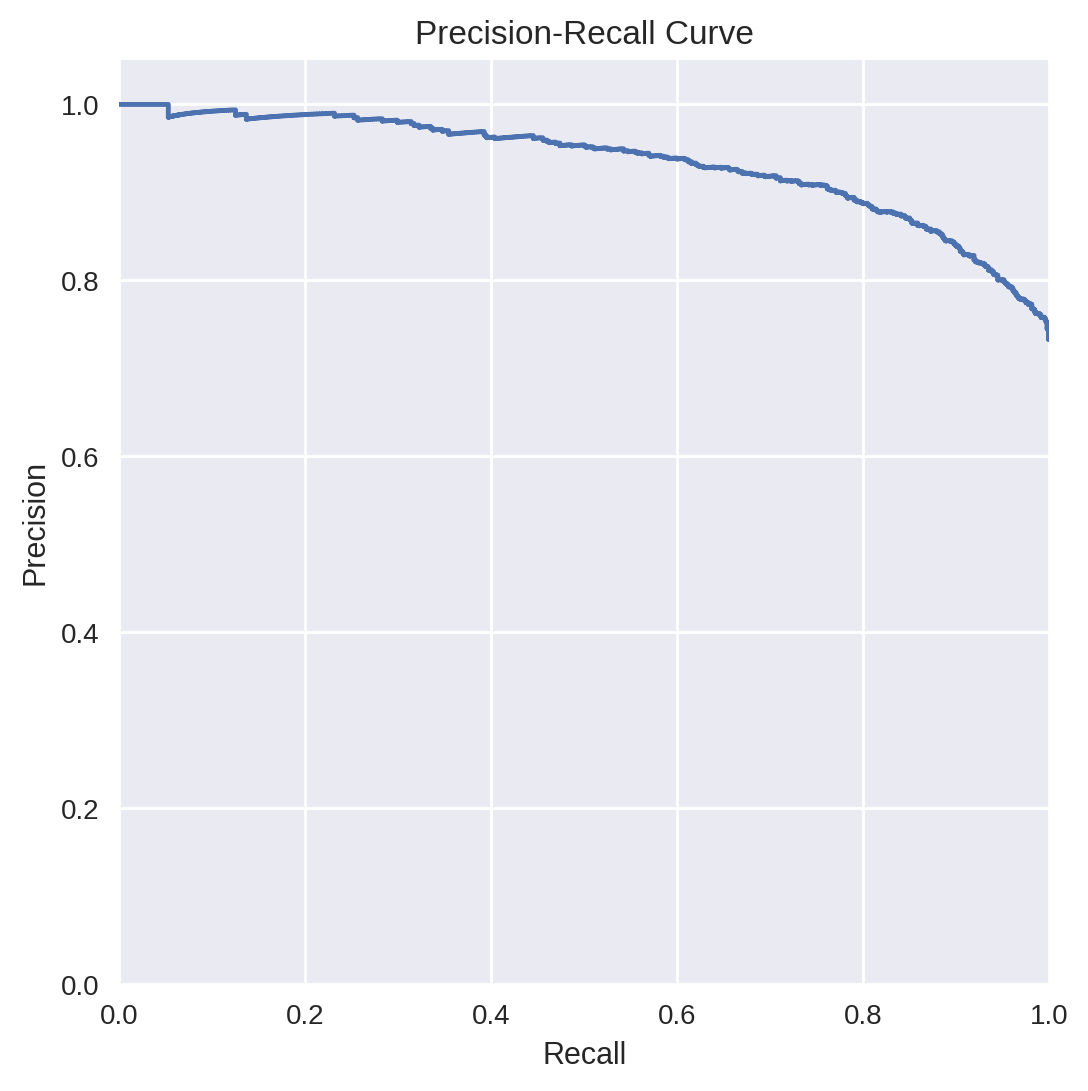

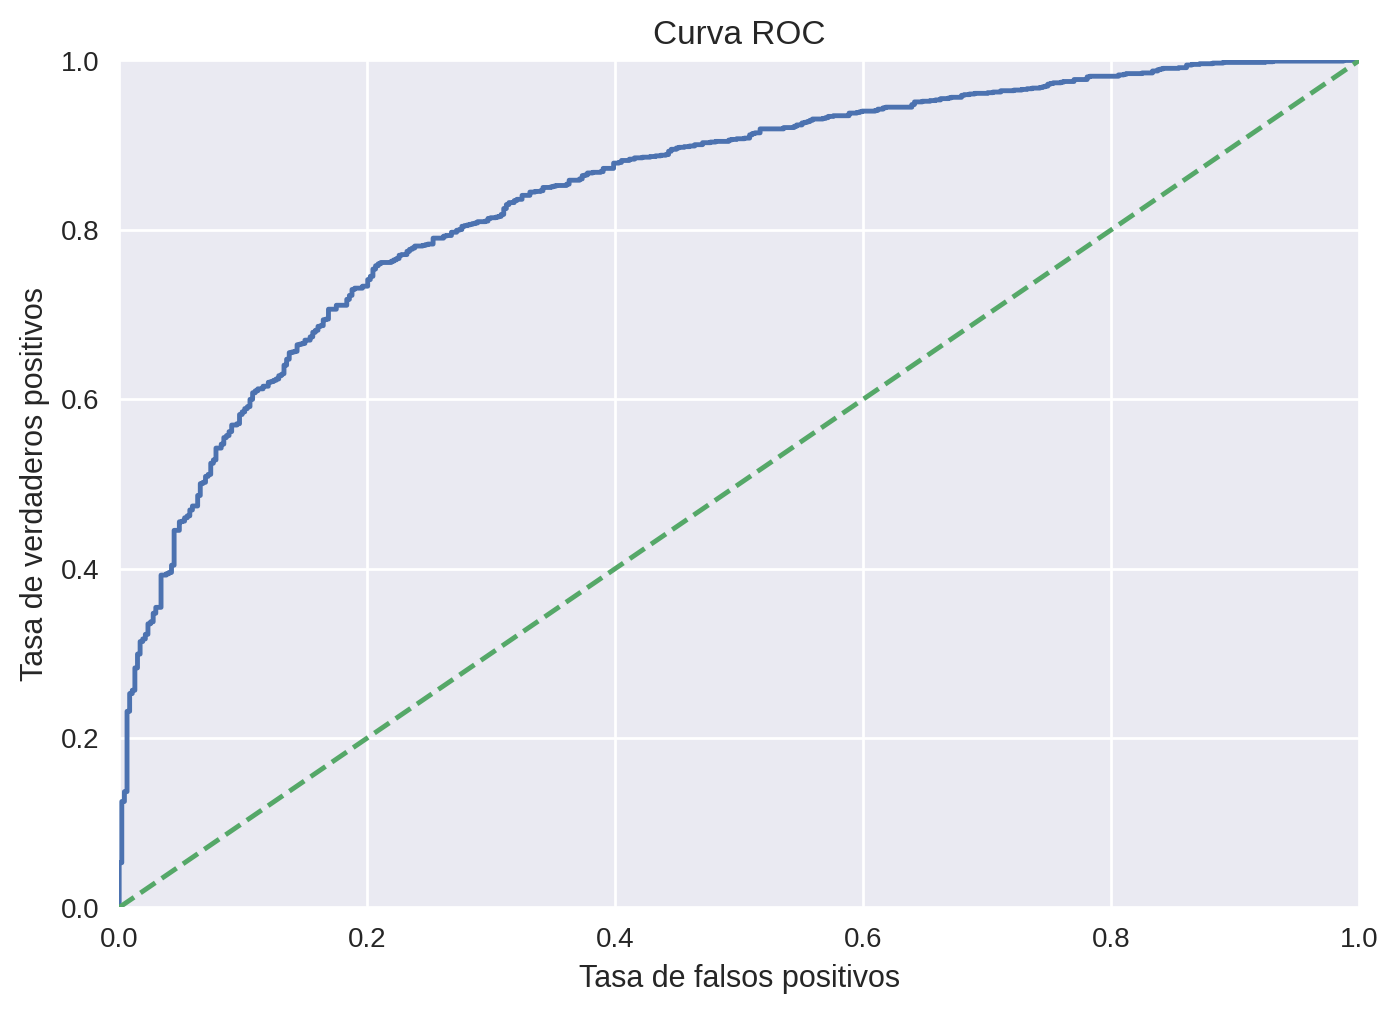

AUC-ROC:  0.8448645822063543


In [68]:
recall_presicion_roc(best_model_RF_GS, features_valid, target_valid)

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Excelente trabajo con este modelamiento inicial!
</div>

### Random forest con Random Search

In [69]:
def random_search_random_forest(X_train, X_valid, y_train, y_valid, param_dist, n_iter=100):
    """Realiza una búsqueda aleatoria para encontrar los mejores parámetros para un Bosque Aleatorio."""
    # Inicializar el modelo de Bosque Aleatorio
    rf_classifier = RandomForestClassifier()
    
    # Inicializar el objeto RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=n_iter, cv=5, random_state=42, n_jobs=-1)
    
    # Realizar la búsqueda aleatoria en los datos de entrenamiento
    random_search.fit(X_train, y_train)
    
    # Obtener los mejores parámetros y el mejor modelo
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    
    # Evaluar el mejor modelo en los datos de validación
    accuracy = best_model.score(X_valid, y_valid)
    
    return best_params, accuracy, best_model

# Ejemplo de parámetros a probar en la búsqueda aleatoria para Random Forest
param_dist = {
    'n_estimators': randint(50, 150, 200),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Llamar a la función random_search_random_forest con tus datos de entrenamiento y validación
best_params_RF_RS, accuracy, best_model_RF_RS = random_search_random_forest(features_train, features_valid, target_train, target_valid, param_dist)

print("Mejores parámetros encontrados:", best_params_RF_RS)
print("Precisión del mejor modelo en los datos de validación:", accuracy)

Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 254}
Precisión del mejor modelo en los datos de validación: 0.7984099943214082


<div class="alert alert-block alert-info">
<b>Se borro las librerías del codigo</b> <a class="tocSkip"></a>
</div>


In [70]:
pred_RF_RS = best_model_RF_RS.predict(features_valid)
parameters_prediction(target_valid, pred_RF_RS)

Matriz de confusión: 
 [[ 216  258]
 [  97 1190]]
Precision:  0.8218232044198895
F1 Score:  0.870201096892139


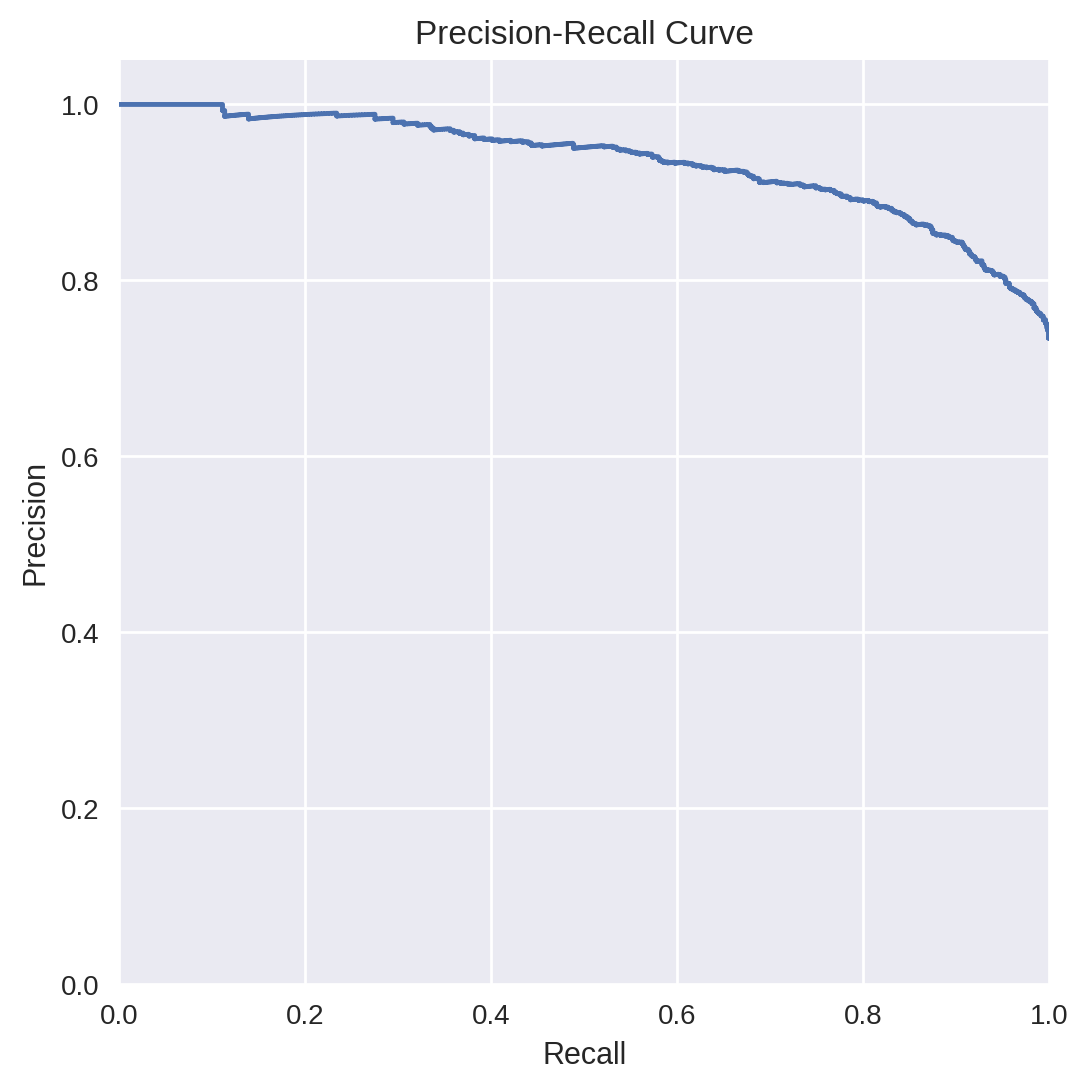

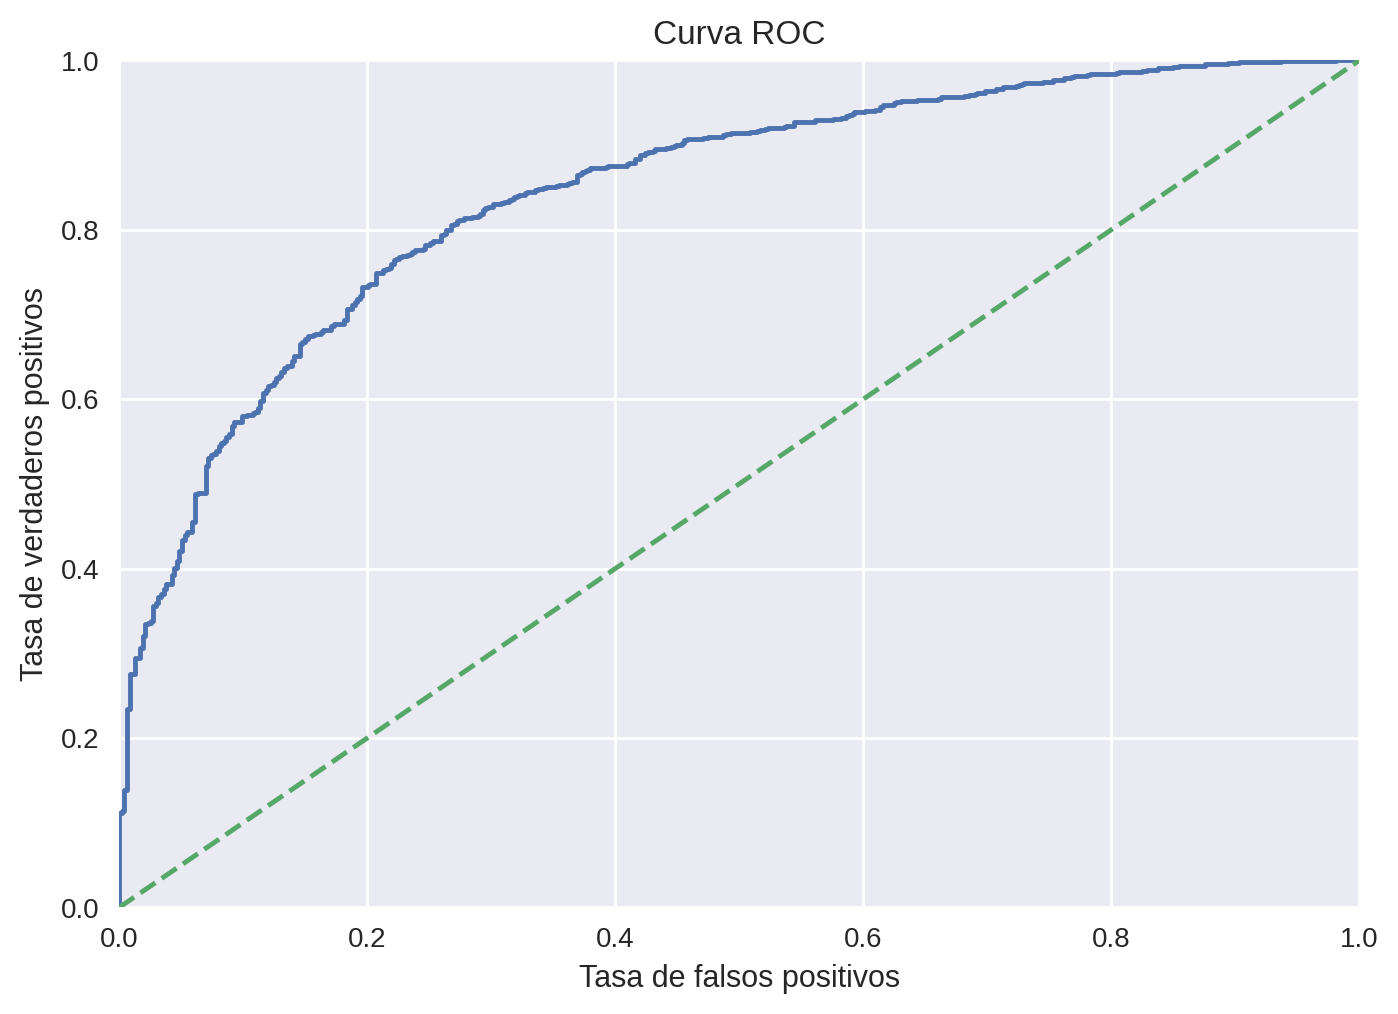

AUC-ROC:  0.8450670286113324


In [71]:
recall_presicion_roc(best_model_RF_RS, features_valid, target_valid)

### Importancia de las características:

Esta sección se realizó para analizar, cual de todas las características es la que más influye en las predicciones de los modelos. Como base se utiliza RandomForest.

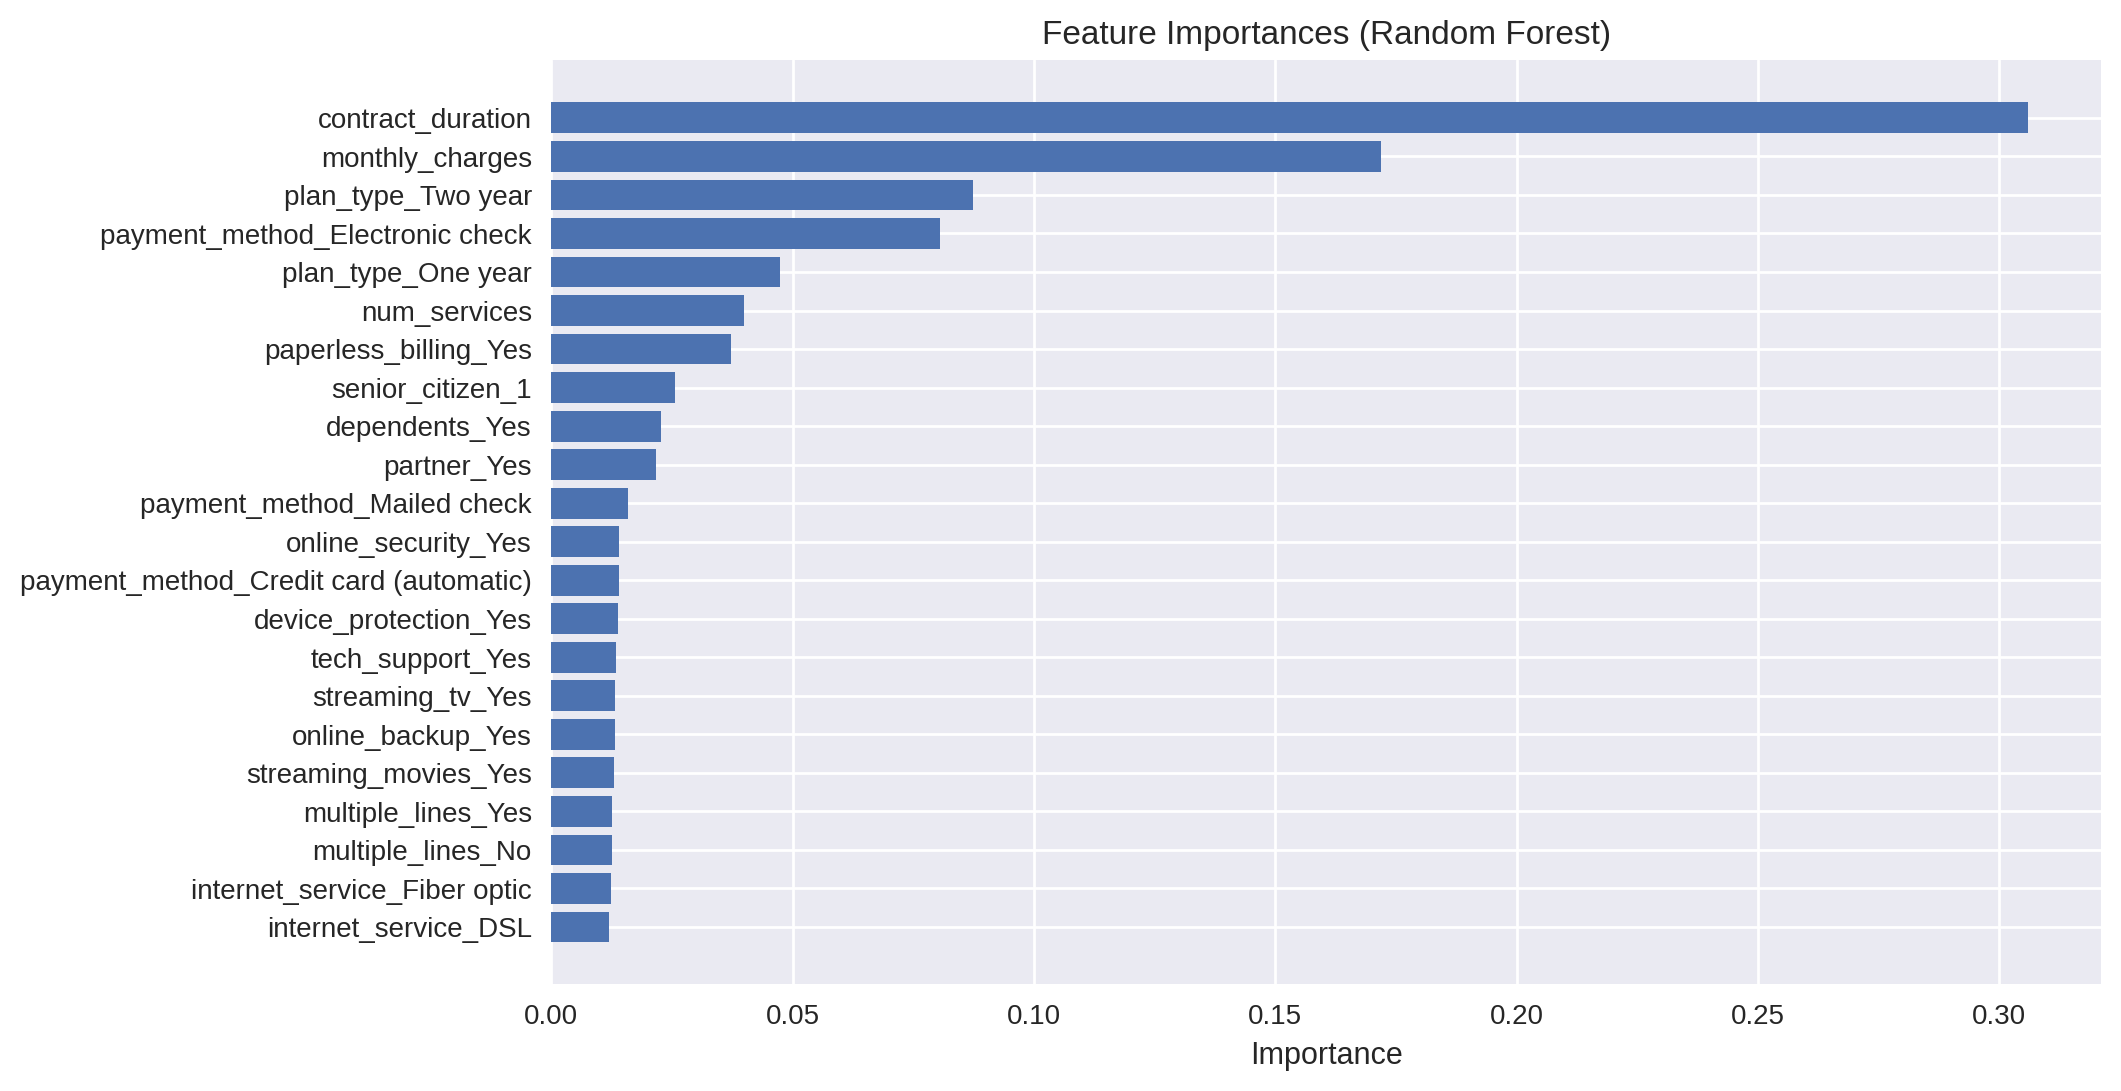

In [72]:
model_rf = RandomForestClassifier(max_depth=10, n_estimators = 150, random_state=0)
model_rf.fit(features_train, target_train)

# Obtener las importancias de las características
importances_rf = model_rf.feature_importances_

# Crear un DataFrame para las importancias
feature_importances_df_rf = pd.DataFrame({
    'Feature': features_train.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df_rf['Feature'], feature_importances_df_rf['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

Con esto se puede observar que las características que más influyen en la cancelación del contrato es la duración, y el costo mensual.

### Light GBM - Random Search

In [ ]:
def random_search_lgbm(X_train, X_valid, y_train, y_valid, param_dist, n_iter=100):
    """Realiza una búsqueda aleatoria para encontrar los mejores parámetros para LightGBM."""
    # Inicializar el modelo LightGBM
    lgb_classifier = lgb.LGBMClassifier()

    # Inicializar el objeto RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_dist, n_iter=n_iter, cv=5, random_state=42, n_jobs=-1)

    # Realizar la búsqueda aleatoria en los datos de entrenamiento
    random_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y el mejor modelo
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_

    # Evaluar el mejor modelo en los datos de validación
    y_pred = best_model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    return best_params, accuracy, best_model

# Ejemplo de parámetros a probar en la búsqueda aleatoria para LightGBM
param_dist_lgbm = {
    'num_leaves': randint(20, 150),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 200),
    'min_child_samples': randint(20, 500)
    #'subsample': uniform(0.5, 1.0),
    #'colsample_bytree': uniform(0.5, 1.0),
    #'reg_alpha': uniform(0, 1.0),
    #'reg_lambda': uniform(0, 1.0)
}

# Llamar a la función random_search_lgb con tus datos de entrenamiento y validación
best_params_lgbm_rs, accuracy, best_model_LGBM_rs = random_search_lgbm(features_train, features_valid, target_train, target_valid, param_dist_lgbm)

print("Mejores parámetros encontrados:", best_params_lgbm_rs)
print("Precisión del mejor modelo en los datos de validación:", accuracy)

<div class="alert alert-block alert-info">
<b>Se comentó los parámetros del "param grid" que generaban warnings</b> <a class="tocSkip"></a>
</div>

In [ ]:
pred_LGBM_RS = best_model_LGBM_rs.predict(features_valid)
parameters_prediction(target_valid, pred_LGBM_RS)

In [ ]:
recall_presicion_roc(best_model_LGBM_rs, features_valid, target_valid)

### Light GBM Grid - Search

In [ ]:
# Definir el grid de hiperparámetros a buscar
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 150, 200],
    'min_child_samples': [20, 50, 100]
}

# Definir el modelo

def grid_search_lgbm(X_train, X_valid, y_train, y_valid, param_grid, n_iter=100):

    model_lgbm_gs = lgb.LGBMClassifier(random_state=42)


    # Configurar GridSearchCV
    grid_search = GridSearchCV(estimator=model_lgbm_gs, param_grid=param_grid, 
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

    # Realizar la búsqueda de los mejores hiperparámetros
    grid_search.fit(features_train, target_train)

    # Obtener los mejores parámetros y el mejor score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Entrenar el modelo con los mejores parámetros en el conjunto de entrenamiento completo
    best_model = grid_search.best_estimator_

    # Predecir en el conjunto de validación
    predictions = best_model.predict(features_valid)

    # Calcular la precisión
    accuracy = accuracy_score(target_valid, predictions)

    print("Mejores hiperparámetros:", best_params)
    print("Mejor score durante GridSearch:", best_score)
    print("Precisión en el conjunto de validación:", accuracy)
    
    return best_params, accuracy, best_model

In [ ]:
# Llamar a la función random_search_lgb con tus datos de entrenamiento y validación
best_params_lgbm_gs, accuracy, best_model_LGBM_gs = grid_search_lgbm(features_train, features_valid, target_train, target_valid, param_grid_lgbm)

print("Mejores parámetros encontrados:", best_params_lgbm_gs)
print("Precisión del mejor modelo en los datos de validación:", accuracy)

In [ ]:
pred_LGBM_GS = best_model_LGBM_gs.predict(features_valid)
parameters_prediction(target_valid, pred_LGBM_GS)

In [ ]:
recall_presicion_roc(best_model_LGBM_gs, features_valid, target_valid)

### Catboost - Grid Search

Para este método fue necesario cambiar los valores True/False por los valores numéricos 1/0 de los datos target, debido a que se generaban errores al momento de compilar el código

In [ ]:
#COnvertir los valores True/False en 1/0 del target
target_train_bo = target_train.astype(int)
target_valid_bo = target_valid.astype(int)

In [ ]:
### Funcion para catboost con Gridsearch

# Definir el grid de hiperparámetros a buscar
param_grid_cb = {
    'iterations': [100, 200, 250],
    'depth': [6, 8, 10],
    'learning_rate': [0.1, 0.05, 0.01],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100]
}

# Definir el modelo
def grid_search_catboost(X_train, X_valid, y_train, y_valid, param_grid):
    
    model_catboost = cb.CatBoostClassifier(random_state=42, silent=True)

    # Configurar GridSearchCV
    grid_search = GridSearchCV(estimator=model_catboost, param_grid=param_grid, 
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

    # Realizar la búsqueda de los mejores hiperparámetros
    grid_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y el mejor score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Entrenar el modelo con los mejores parámetros en el conjunto de entrenamiento completo
    best_model = grid_search.best_estimator_

    # Predecir en el conjunto de validación
    predictions = best_model.predict(features_valid)

    # Calcular la precisión
    accuracy = accuracy_score(target_valid, predictions)

    #print("Mejores hiperparámetros:", best_params)
    #print("Mejor score durante GridSearch:", best_score)
    #print("Precisión en el conjunto de validación:", accuracy)
    
    return best_params, accuracy, best_model
    

In [ ]:
# Llamar a la función grid_search_catboost con tus datos de entrenamiento y validación
## Requiere de 30 min para procesar
best_params_cb_gs, accuracy, best_model_cb_gs = grid_search_catboost(features_train, features_valid, target_train_bo, target_valid_bo, param_grid_cb)
print("Mejores parámetros encontrados:", best_params_cb_gs)
print("Precisión del mejor modelo en los datos de validación:", accuracy)

In [ ]:
pred_CB_GS = best_model_cb_gs.predict(features_valid)
parameters_prediction(target_valid, pred_CB_GS)

In [ ]:
recall_presicion_roc(best_model_cb_gs, features_valid, target_valid)

### Catboost - Random Search

In [ ]:
def random_search_catboost(X_train, X_valid, y_train, y_valid, param_dist, n_iter=100):
    """Realiza una búsqueda aleatoria para encontrar los mejores parámetros para CatBoost."""
    # Inicializar el modelo CatBoost
    catboost_classifier = cb.CatBoostClassifier(verbose=0)

    # Inicializar el objeto RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=catboost_classifier, param_distributions=param_dist, n_iter=n_iter, cv=5, random_state=42, n_jobs=-1)

    # Realizar la búsqueda aleatoria en los datos de entrenamiento
    random_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y el mejor modelo
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_

    # Evaluar el mejor modelo en los datos de validación
    y_pred = best_model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    return best_params, accuracy, best_model

# Ejemplo de parámetros a probar en la búsqueda aleatoria para CatBoost
param_dist_cb = {
    'iterations': randint(10, 100),
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'l2_leaf_reg': uniform(1, 10),
    'border_count': randint(32, 255)
}

# Llamar a la función random_search_catboost con tus datos de entrenamiento y validación
best_params_cb_rs, accuracy, best_model_CB_RS = random_search_catboost(features_train, features_valid, target_train_bo, target_valid_bo, param_dist_cb)

print("Mejores parámetros encontrados:", best_params_cb_rs)
print("Precisión del mejor modelo en los datos de validación:", accuracy)

In [ ]:
pred_CB_RS = best_model_CB_RS.predict(features_valid)
parameters_prediction(target_valid, pred_CB_RS)

In [ ]:
recall_presicion_roc(best_model_CB_RS, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se comentó los parámetros del "param grid" que generaban warnings</b> <a class="tocSkip"></a>
</div>

### XGBoost - Random Search

In [ ]:
## Demora aproximadamente 30 min en correr.
def random_search_xgboost(X_train, X_valid, y_train, y_valid, param_dist, n_iter=100):
    """Realiza una búsqueda aleatoria para encontrar los mejores parámetros para XGBoost."""
    # Inicializar el modelo XGBoost
    xgboost_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Inicializar el objeto RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_dist, n_iter=n_iter, cv=5, random_state=42, n_jobs=-1)

    # Realizar la búsqueda aleatoria en los datos de entrenamiento
    random_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y el mejor modelo
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_

    # Evaluar el mejor modelo en los datos de validación
    y_pred = best_model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    return best_params, accuracy, best_model

# Ejemplo de parámetros a probar en la búsqueda aleatoria para XGBoost
param_dist_xgb = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3)
     #'subsample': uniform(0.5, 1),
     #'colsample_bytree': uniform(0.5, 1)
     #'gamma': uniform(0, 0.5),
     #'reg_alpha': uniform(0, 1),
     #'reg_lambda': uniform(0, 1)
}

# Convertir los valores de True/False a 1/0 en target_train y target_valid
target_train = target_train.astype(int)
target_valid = target_valid.astype(int)

# Llamar a la función random_search_xgboost con tus datos de entrenamiento y validación
best_params_xgb_rs, accuracy, best_model_XGB_RS = random_search_xgboost(features_train, features_valid, target_train, target_valid, param_dist_xgb)

print("Mejores parámetros encontrados:", best_params_xgb_rs)
print("Precisión del mejor modelo en los datos de validación:", accuracy)

<div class="alert alert-block alert-info">
<b>Se comentó los parámetros del "param grid" que generaban warnings</b> <a class="tocSkip"></a>
</div>

In [ ]:
pred_XGB_RS = best_model_XGB_RS.predict(features_valid)
parameters_prediction(target_valid, pred_XGB_RS)


In [ ]:
recall_presicion_roc(best_model_XGB_RS, features_valid, target_valid)

### XGBoost - Grid Search

In [ ]:
# Función XGBoost 

# Definir el grid de hiperparámetros a buscar
param_grid_xgb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Definir el modelo
def grid_search_xgboost(X_train, X_valid, y_train, y_valid, param_grid):
    
    # Definir el modelo
    model_xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                  random_state=42, use_label_encoder=False)
    # Configurar GridSearchCV
    grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, 
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

    # Realizar la búsqueda de los mejores hiperparámetros
    grid_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y el mejor score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Entrenar el modelo con los mejores parámetros en el conjunto de entrenamiento completo
    best_model = grid_search.best_estimator_

    # Predecir en el conjunto de validación
    predictions = best_model.predict(features_valid)

    # Calcular la precisión
    accuracy = accuracy_score(target_valid, predictions)

    print("Mejores hiperparámetros:", best_params)
    print("Mejor score durante GridSearch:", best_score)
    print("Precisión en el conjunto de validación:", accuracy)
    
    return best_params, accuracy, best_model

In [ ]:
# Llamar a la función grid_search_catboost con tus datos de entrenamiento y validación
### Esto demora en correr Aprox 1h

best_params_xgb_gs, accuracy, best_model_xgb_gs = grid_search_xgboost(features_train, features_valid, target_train_bo, target_valid_bo, param_grid_xgb)
print("Mejores parámetros encontrados:", best_params_xgb_gs)
print("Precisión del mejor modelo en los datos de validación:", accuracy)

In [ ]:
pred_XGB_GS = best_model_xgb_gs.predict(features_valid)
parameters_prediction(target_valid, pred_XGB_GS)


In [ ]:
recall_presicion_roc(best_model_xgb_gs, features_valid, target_valid)

## Corrigiendo el desbalanceo de clases

El desbalance de clases puede ser el causante de un limite en el rendimiento total de los modelos, por lo cual se probará diferentes técnicas para manejar este problema y analizar si mejora el rendimiento:
Dado que ya se obtuvo los mejores parámetros para cada uno de los modelos se entrenará los modelos con estos parámetros y con los nuevos datos.

## Datos con sobremuestreo:

Se utilizará sobremuestreo en los datos para que las observaciones de la clase minoritaria sean más comunes.

In [ ]:
data_df_encoded
target = data_df_encoded['contract_status']
features = data_df_encoded.drop('contract_status', axis=1)

In [ ]:
## Función para realizar el sobremuestreo de los datos.

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled=pd.concat([features_zeros]*repeat+[features_ones])
    target_upsampled=pd.concat([target_zeros]*repeat+[target_ones])
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Funcion para encontrar el mejor valor de F1 con sobremuestreo

In [ ]:
def upsample_pred(model, features_train, target_train, features_valid, target_valid, rep):
    best_rep=0
    best_score=0
    
    # Estableciendo el rango para las repeticiones
    for rep in range(2,20):
        features_upsampled, target_upsampled=upsample(features_train, target_train, rep)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid=model.predict(features_valid)
        score=f1_score(target_valid, predicted_valid)
        print(f'Valor de F1 con un sobremuestreo de {rep} Repeticiones: {score}')
        if score>best_score:
            best_rep = rep
            best_score=score

    print(f'La mejor cantidad de repeticiones para el sobremuestreo son: {best_rep}, y su nivel de calificación es: {best_score}')
    
    # Aplicando al modelo los datos con sobremuestreo
    features_upsampled, target_upsampled=upsample(features_train, target_train, best_rep)
    model.fit(features_upsampled, target_upsampled)
    best_prediction_valid=model.predict(features_valid)
    
    return best_prediction_valid, features_upsampled, target_upsampled

### Regresion lineal - Upsample:

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_lr, features_upsampled_LR, target_upsampled_LR = upsample_pred(
    model_linear_reg, features_train, target_train, features_valid, target_valid, 20)

Verificando que se haya realizado el sobremuestreo:

In [ ]:
count=target_upsampled_LR.value_counts(normalize=True)
count

In [ ]:
### Aplicando el modelo de Regresión Lineal
model_LR_upsample = LogisticRegression(solver='liblinear', class_weight='balanced')
model_LR_upsample.fit(features_upsampled_LR, target_upsampled_LR)
pred_upsample_lr = model_LR_upsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_lr))

In [ ]:
parameters_prediction(target_valid, pred_upsample_lr)

In [ ]:
recall_presicion_roc(model_LR_upsample, features_valid, target_valid)

### Desision Tree - Upsampled

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_dt_gs, features_upsampled_dt_gs, target_upsampled_dt_gs = upsample_pred(best_model_DT_GS, features_train, target_train, features_valid, target_valid, 20)

In [ ]:
model_DT_gs_upsample = DecisionTreeClassifier(**best_params_DT, class_weight='balanced')
model_DT_gs_upsample.fit(features_upsampled_dt_gs, target_upsampled_dt_gs)
pred_upsample_DT_gs = model_DT_gs_upsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_DT_gs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_DT_gs)

In [ ]:
recall_presicion_roc(model_DT_gs_upsample, features_valid, target_valid)

###  Random Forest - Grid Search Upsample

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_rf_gs, features_upsampled_rf_gs, target_upsampled_rf_gs = upsample_pred(best_model_RF_GS, features_train, target_train, features_valid, target_valid, 20)

In [ ]:
model_RF_gs_upsample = RandomForestClassifier(**best_params_rf, class_weight='balanced')
model_RF_gs_upsample.fit(features_upsampled_rf_gs, target_upsampled_rf_gs)
pred_upsample_RF_gs = model_RF_gs_upsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_RF_gs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_RF_gs)

In [ ]:
recall_presicion_roc(model_RF_gs_upsample, features_valid, target_valid)

### Random Forest - Randomized Search Upsampled

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_rf_rs, features_upsampled_rf_rs, target_upsampled_rf_rs = upsample_pred(
    best_model_RF_RS, features_train, target_train, features_valid, target_valid, 20)

In [ ]:
model_RF_rs_upsample = RandomForestClassifier(**best_params_RF_RS, class_weight='balanced')
model_RF_rs_upsample.fit(features_upsampled_rf_rs, target_upsampled_rf_rs)
pred_upsample_RF_rs = model_RF_rs_upsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_RF_rs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_RF_rs)

In [ ]:
recall_presicion_roc(model_RF_rs_upsample, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se borro los parámetros del param grid que causaba el warning</b> <a class="tocSkip"></a>
</div>

### Light GBM - Random Search upsampled

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_lgbm_rs, features_upsampled_lgbm_rs, target_upsampled_lgbm_rs = upsample_pred(best_model_LGBM_rs, features_train, target_train, features_valid, target_valid, 20)

In [ ]:
model_LGBM_RS_upsampled=lgb.LGBMClassifier(**best_params_lgbm_rs, class_weight='balanced')
model_LGBM_RS_upsampled.fit(features_upsampled_lgbm_rs, target_upsampled_lgbm_rs)
pred_upsample_LGBM_rs = model_LGBM_RS_upsampled.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_LGBM_rs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_LGBM_rs)

In [ ]:
recall_presicion_roc(model_LGBM_RS_upsampled, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se borro los parámetros del param grid que causaba el warning</b> <a class="tocSkip"></a>
</div>

### Light GBM - Grid Search upsampled

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_lgbm_gs, features_upsampled_lgbm_gs, target_upsampled_lgbm_gs = upsample_pred(
    best_model_LGBM_gs, features_train, target_train, features_valid, target_valid, 20)

In [ ]:
model_LGBM_GS_upsampled=lgb.LGBMClassifier(**best_params_lgbm_gs, class_weight='balanced')
model_LGBM_GS_upsampled.fit(features_upsampled_lgbm_gs, target_upsampled_lgbm_gs)
pred_upsample_LGBM_gs = model_LGBM_GS_upsampled.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_LGBM_gs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_LGBM_gs)

In [ ]:
recall_presicion_roc(model_LGBM_GS_upsampled, features_valid, target_valid)

### Catboost - GridSearch upsampled

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_cb_gs, features_upsampled_cb_gs, target_upsampled_cb_gs = upsample_pred(
    best_model_LGBM_gs, features_train, target_train, features_valid, target_valid, 20)


In [ ]:
model_CB_GS_upsample=cb.CatBoostClassifier(**best_params_cb_gs)
model_CB_GS_upsample.fit(features_upsampled_cb_gs, target_upsampled_cb_gs)
pred_upsample_CB_gs = model_CB_GS_upsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_CB_gs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_CB_gs)

In [ ]:
recall_presicion_roc(model_CB_GS_upsample, features_valid, target_valid)

### Catboost - Random Search Upsampled

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_cb_rs, features_upsampled_cb_rs, target_upsampled_cb_rs = upsample_pred(
    best_model_CB_RS, features_train, target_train, features_valid, target_valid, 20)


In [ ]:
model_CB_RS_upsample=cb.CatBoostClassifier(**best_params_cb_rs)
model_CB_RS_upsample.fit(features_upsampled_cb_rs, target_upsampled_cb_rs)
pred_upsample_CB_rs = model_CB_RS_upsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_CB_rs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_CB_rs)

In [ ]:
recall_presicion_roc(model_CB_RS_upsample, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se borro los parámetros del param grid que causaba el warning</b> <a class="tocSkip"></a>
</div>

### XGBoost - Random Search upsampled

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_xgb_rs, features_upsampled_xgb_rs, target_upsampled_xgb_rs = upsample_pred(
    best_model_XGB_RS, features_train, target_train, features_valid, target_valid, 20)

In [ ]:
model_XGB_RS_upsample = xgb.XGBClassifier(**best_params_xgb_rs, use_label_encoder=False, eval_metric='logloss')
model_XGB_RS_upsample.fit(features_upsampled_xgb_rs, target_upsampled_xgb_rs)
pred_upsample_XGB_rs = model_XGB_RS_upsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_XGB_rs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_XGB_rs)


In [ ]:
recall_presicion_roc(model_XGB_RS_upsample, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se borro los parámetros del param grid que causaba el warning</b> <a class="tocSkip"></a>
</div>

### XGBoost - Grid Search upsampled

In [ ]:
## Llamando a la función creada para realizar el sobremuestreo
best_pred_upsample_xgb_gs, features_upsampled_xgb_gs, target_upsampled_xgb_gs = upsample_pred(
    best_model_xgb_gs, features_train, target_train, features_valid, target_valid, 20)

In [ ]:
model_XGB_GS_upsample = xgb.XGBClassifier(**best_params_xgb_gs, use_label_encoder=False, eval_metric='logloss')
model_XGB_GS_upsample.fit(features_upsampled_xgb_gs, target_upsampled_xgb_gs)
pred_upsample_XGB_gs = model_XGB_GS_upsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_upsample_XGB_gs))

In [ ]:
parameters_prediction(target_valid, pred_upsample_XGB_gs)


In [ ]:
recall_presicion_roc(model_XGB_GS_upsample, features_valid, target_valid)

## Utilizando técnica de submuestreo:

Mediante esta técnica vamos a tomar solo una parte de los datos que contienen el valor de 'target' en 1, y vamos a observar que sucede con el modelo

In [ ]:
#Función para el submuestreo

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_ones.sample(frac=fraction, random_state=12345)]
        + [features_zeros]
    )
    target_downsampled = pd.concat(
        [target_ones.sample(frac=fraction, random_state=12345)]
        + [target_zeros]
    )
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )
       
    
    return features_downsampled, target_downsampled


Función para encontrar el mejor valor de F1 con submuestreo:

In [ ]:
def downsample_pred(model, features_train, target_train, features_valid, target_valid):
    best_frac=0
    best_score=0
    
    for frac in np.arange(0.1, 1.1, 0.1):
        features_downsampled, target_downsampled=downsample(features_train, target_train, frac)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid=model.predict(features_valid)
        score=f1_score(target_valid, predicted_valid)
        print(f'Valor de F1 con un submuestreo de {frac} es {score}')
        if score>best_score:
            best_frac = frac
            best_score=score

    print(f'La mejor fracción para el submuestreo es {best_frac}, y su nivel de calificación es: {best_score}')
    
    features_downsampled, target_downsampled=downsample(features_train, target_train, best_frac)
    model.fit(features_downsampled, target_downsampled)
    best_prediction_valid=model.predict(features_valid)
    
    return best_prediction_valid, features_downsampled, target_downsampled

### Regresion lineal - downsampled:

In [ ]:
## Llamando a la función creada para realizar el submuestreo
best_pred_downsample_lr, features_downsampled_LR, target_downsampled_LR = downsample_pred(model_linear_reg, 
                                                                                        features_train, 
                                                                                        target_train, 
                                                                                        features_valid, 
                                                                                        target_valid)

In [ ]:
model_LR_downsample = LogisticRegression(solver='liblinear', class_weight='balanced')
model_LR_downsample.fit(features_downsampled_LR, target_downsampled_LR)
pred_downsample_lr = model_LR_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_lr))

In [ ]:
parameters_prediction(target_valid, pred_downsample_lr)

In [ ]:
recall_presicion_roc(model_LR_downsample, features_valid, target_valid)

### Decision Tree - GridSearch downsampled

In [ ]:
best_pred_downsample_dt_gs, features_downsample_dt_gs, target_downsample_dt_gs = downsample_pred(best_model_DT_GS,
                                                                                                 features_train,
                                                                                                 target_train,
                                                                                                 features_valid,
                                                                                                 target_valid)

In [ ]:
model_DT_gs_downsample = DecisionTreeClassifier(**best_params_DT, class_weight='balanced')
model_DT_gs_downsample.fit(features_downsample_dt_gs, target_downsample_dt_gs)
pred_downsample_DT_gs = model_DT_gs_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_DT_gs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_DT_gs)

In [ ]:
recall_presicion_roc(model_DT_gs_downsample, features_valid, target_valid)

### Random Forest - Grid Search downsampled

In [ ]:
best_pred_downsample_rf_gs, features_downsample_rf_gs, target_downsample_rf_gs = downsample_pred(best_model_RF_GS,
                                                                                           features_train,
                                                                                           target_train,
                                                                                           features_valid,
                                                                                           target_valid)

In [ ]:
model_RF_gs_downsample = RandomForestClassifier(**best_params_rf, class_weight='balanced')
model_RF_gs_downsample.fit(features_downsample_rf_gs, target_downsample_rf_gs)
pred_downsample_RF_gs = model_RF_gs_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_RF_gs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_RF_gs)

In [ ]:
recall_presicion_roc(model_RF_gs_downsample, features_valid, target_valid)

### Random Forest - Random Search downsampled

In [ ]:
best_pred_downsample_rf_rs, features_downsample_rf_rs, target_downsample_rf_rs = downsample_pred(best_model_RF_RS,
                                                                                           features_train,
                                                                                           target_train,
                                                                                           features_valid,
                                                                                           target_valid)

In [ ]:
model_RF_rs_downsample = RandomForestClassifier(**best_params_RF_RS, class_weight='balanced')
model_RF_rs_downsample.fit(features_downsample_rf_rs, target_downsample_rf_rs)
pred_downsample_RF_rs = model_RF_rs_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_RF_rs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_RF_rs)

In [ ]:
recall_presicion_roc(model_RF_rs_downsample, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se borro los parámetros del param grid que causaba el warning</b> <a class="tocSkip"></a>
</div>

### Light GBM - Random Search downsample

In [ ]:
best_pred_downsample_lgbm_rs, features_downsample_lgbm_rs, target_downsample_lgbm_rs = downsample_pred(best_model_LGBM_rs,
                                                                                                 features_train,
                                                                                                 target_train,
                                                                                                 features_valid,
                                                                                                 target_valid)

In [ ]:
model_LGBM_RS_downsample=lgb.LGBMClassifier(**best_params_lgbm_rs, class_weight='balanced')
model_LGBM_RS_downsample.fit(features_downsample_lgbm_rs, target_downsample_lgbm_rs)
pred_downsample_LGBM_rs = model_LGBM_RS_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_LGBM_rs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_LGBM_rs)

In [ ]:
recall_presicion_roc(model_LGBM_RS_downsample, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se borro los parámetros del param grid que causaba el warning</b> <a class="tocSkip"></a>
</div>

### Light GBM - Grid Search downsampled

In [ ]:
best_pred_downsample_lgbm_gs, features_downsample_lgbm_gs, target_downsample_lgbm_gs = downsample_pred(best_model_LGBM_gs,
                                                                                                 features_train,
                                                                                                 target_train,
                                                                                                 features_valid,
                                                                                                 target_valid)

In [ ]:
model_LGBM_GS_downsample=lgb.LGBMClassifier(**best_params_lgbm_gs, class_weight='balanced')
model_LGBM_GS_downsample.fit(features_downsample_lgbm_gs, target_downsample_lgbm_gs)
pred_downsample_LGBM_gs = model_LGBM_GS_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_LGBM_gs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_LGBM_gs)

In [ ]:
recall_presicion_roc(model_LGBM_GS_downsample, features_valid, target_valid)

### Catboost - GridSearch downsampled

In [ ]:
best_pred_downsample_cb_gs, features_downsample_cb_gs, target_downsample_cb_gs = downsample_pred(best_model_LGBM_gs,
                                                                                                 features_train,
                                                                                                 target_train,
                                                                                                 features_valid, 
                                                                                                 target_valid)

In [ ]:
model_CB_GS_downsample=cb.CatBoostClassifier(**best_params_cb_gs)
model_CB_GS_downsample.fit(features_downsample_cb_gs, target_downsample_cb_gs)
pred_downsample_CB_gs = model_CB_GS_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_CB_gs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_CB_gs)

In [ ]:
recall_presicion_roc(model_CB_GS_downsample, features_valid, target_valid)

### Catboost - Random Search downsampled

In [ ]:
best_pred_downsample_cb_rs, features_downsample_cb_rs, target_downsample_cb_rs = downsample_pred(best_model_CB_RS,
                                                                                                 features_train,
                                                                                                 target_train,
                                                                                                 features_valid, 
                                                                                                 target_valid)

In [ ]:
model_CB_RS_downsample=cb.CatBoostClassifier(**best_params_cb_gs)
model_CB_RS_downsample.fit(features_downsample_cb_rs, target_downsample_cb_rs)
pred_downsample_CB_rs = model_CB_RS_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_CB_rs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_CB_rs)

In [ ]:
recall_presicion_roc(model_CB_RS_downsample, features_valid, target_valid)

### XGBoost - Random Search downsampled

In [ ]:
best_pred_downsample_xgb_rs, features_downsample_xgb_rs, target_downsample_xgb_rs = downsample_pred(
    best_model_XGB_RS, features_train, target_train, features_valid, target_valid)

No hay mejora, por lo que solo se usa el balanced

In [ ]:
model_XGB_RS_downsample = xgb.XGBClassifier(**best_params_xgb_rs, use_label_encoder=False, eval_metric='logloss')
model_XGB_RS_downsample.fit(features_downsample_xgb_rs, target_downsample_xgb_rs)
pred_downsample_XGB_rs = model_XGB_RS_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_XGB_rs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_XGB_rs)

In [ ]:
recall_presicion_roc(model_XGB_RS_downsample, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se borro el parámetro classweight, que causaba el warning</b> <a class="tocSkip"></a>
</div>

### XGBoost - Grid Search downsampled

In [ ]:
best_pred_downsample_xgb_gs, features_downsample_xgb_gs, target_downsample_xgb_gs = downsample_pred(
    best_model_xgb_gs, features_train, target_train, features_valid, target_valid)

In [ ]:
model_XGB_GS_downsample = xgb.XGBClassifier(**best_params_xgb_gs, use_label_encoder=False, eval_metric='logloss')
model_XGB_GS_downsample.fit(features_downsample_xgb_gs, target_downsample_xgb_gs)
pred_downsample_XGB_gs = model_XGB_GS_downsample.predict(features_valid)
print('La exactitud del modelo es: ', accuracy_score(target_valid, pred_downsample_XGB_gs))

In [ ]:
parameters_prediction(target_valid, pred_downsample_XGB_gs)

In [ ]:
recall_presicion_roc(model_XGB_GS_downsample, features_valid, target_valid)

<div class="alert alert-block alert-info">
<b>Se borro los parámetros del param grid que causaba el warning al utilizar Random Search</b> <a class="tocSkip"></a>
</div>

## Resultados

En la siguiente tabla se resume los resultados obtenidos con los diferentes modelos de predicción:


| Modelo            | Tipo de Búsqueda de Parámetros | Datos utilizados | Exactitud | Precisión | F1     | AUC-ROC |
|-------------------|------------------|--------------------------|-----------|-----------|--------|---------|
| Dummy             | N/A              | Original                 | 0.730     | 0.730     | 0.844  | 0.5     |
| Linear Regression | N/A              | Original                 | 0.785     | 0.829     | 0.858  | 0.830   |
| Decision Tree     | N/A              | Original                 | 0.802     | 0.829     | 0.871  | 0.836   |
| Random Forest     | Grid Search      | Original                 | 0.798     | 0.822     | 0.870  | 0.844   |
| Random Forest     | Random Search    | Original                 | 0.821     | 0.821     | 0.870  | 0.844   |
| Light GBM         | Grid Search      | Original                 | 0.854     | 0.872     | 0.904  | 0.899   |
| Light GBM         | Random Search    | Original                 | 0.845     | 0.863     | 0.898  | 0.885   |
| Catboost          | Grid Search      | Original                 | 0.854     | 0.876     | 0.903  | 0.891   |
| Catboost          | Random Search    | Original                 | 0.855     | 0.870     | 0.905  | 0.898   |
| XGBoost           | Grid Search      | Original                 | 0.866     | 0.881     | 0.911  | 0.907   |
| XGBoost           | Random Search    | Original                 | 0.869     | 0.885     | 0.913  | 0.910   |
| Linear Regression | N/A              | Upsampled                | 0.732     | 0.909     | 0.793  | 0.831   |
| Decision Tree     | N/A              | Upsampled                | 0.763     | 0.896     | 0.825  | 0.835   |
| Random Forest     | Grid Search      | Upsampled                | 0.770     | 0.896     | 0.824  | 0.842   |
| Random Forest     | Random Search    | Upsampled                | 0.766     | 0.903     | 0.826  | 0.840   |
| Light GBM         | Grid Search      | Upsampled                | 0.827     | 0.912     | 0.877  | 0.893   |
| Light GBM         | Random Search    | Upsampled                | 0.805     | 0.910     | 0.859  | 0.885   |
| Catboost          | Grid Search      | Upsampled                | 0.833     | 0.893     | 0.885  | 0.895   |
| Catboost          | Random Search    | Upsampled                | 0.846     | 0.905     | 0.883  | 0.893   |
| XGBoost           | Grid Search      | Upsampled                | 0.859     | 0.908     | 0.903  | 0.909   |
| XGBoost           | Random Search    | Upsampled                | 0.858     | 0.911     | 0.901  | 0.915   |
| Linear Regression | N/A              | Downsampled              | 0.744     | 0.841     | 0.865  | 0.838   |
| Decision Tree     | N/A              | Downsampled              | 0.755     | 0.900     | 0.817  | 0.837   |
| Random Forest     | Grid Search      | Downsampled              | 0.779     | 0.894     | 0.840  | 0.850   |
| Random Forest     | Random Search    | Downsampled              | 0.787     | 0.875     | 0.850  | 0.852   |
| Light GBM         | Grid Search      | Downsampled              | 0.825     | 0.913     | 0.875  | 0.900   |
| Light GBM         | Random Search    | Downsampled              | 0.810     | 0.915     | 0.863  | 0.888   |
| Catboost          | Grid Search      | Downsampled              | 0.862     | 0.876     | 0.909  | 0.905   |
| Catboost          | Random Search    | Downsampled              | 0.851     | 0.870     | 0.902  | 0.898   |
| XGBoost           | Grid Search      | Downsampled              | 0.866     | 0.880     | 0.911  | 0.905   |
| XGBoost           | Random Search    | Downsampled              | 0.841     | 0.866     | 0.895  | 0.884   |

De los resultados obtenidos se generan las siguientes conclusiones:

- Cada uno de los modelos probados ha sido mejor que el modelo dummy creado como base de comparación. Este modelo solo lograba aun AUC-ROC de 0.5, mientras que los demás modelos tuvieron valores de AUC-ROC sobre 0.8
- Los modelos que dan la mejor exactitud son los de XGBoost y Catboost, entrenado con los datos originales. Se logró un valor de de 0.866 de exatitud.
- Los modelos que dan una mejor precisión son los de Light GBM upsampled y el de XGBoost Upsampled, con los cuales se logró un valor de precisión de 0.915 y 0.914 respectivamente.
- Los modelos con los que se obtienen los mejores valores de F1 son Catboost y XGBoost, entrenados con los datos originales. Se logró un valor de F1 máximo de 0.914.
- Finalmente, los modelos que mejor resultado de AUC-ROC generan son Catboost y XGBoost con los datos upsampled 0.909 y 0.910 respectivamente, con lo que concluye que estos son los mejores modelos para la predicción solicitada.

En el proximo documento mediante un informe se detallará sobre el proceso realizado, los resultados, las conclusiones que se obtuvieron y las recomendaciones a la empresa de telecomunicaciones.

<div class="alert alert-block alert-danger">

# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo, Leandro. Nos quedan únicamente algunos elementos por resolver antes de poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-success">

# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo, Leandro. Todo ha sido corregido y has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>